# **Leitrura e Interpretação dos Dados ML**

## **Sumário**

- [1. Introdução](#1)
  - [1.1 Instalação de Pacotes Python](#11)
  - [1.2 Importação das Bibliotecas](#12)
- [2. Carregamento dos Dados](#2)
  - [2.1 Carregando Arquivo](#21)
  - [2.2. Tamanho do DataFrame](#22)
  - [2.2. Dados Faltantes ou Nulos](#22)
  - [2.4. Análise do tipo de dado](#24)
  - [2.5 Verificando o Alvo](#25)
- [3. Análise Exploratória dos Dados](#3)
  - [3.1. Tabelas de Estatística descritiva](#31)
  - [3.2. Visualizacao Gráfica](#32)
- [4. Modelagem Preditiva](#4)
  - [4.1. Separando o Modelo para Treino e Teste](#41)
  - [4.2. Modelo de Regressão Logistica](#42)
  - [4.3. Modelo de Árvore de Decisão](#43)
  - [4.4. Modelo de Floresta Aleatória](#43)
  - [4.5. Modelo de K-Nearest Neoghbeils (KNN)](#44)
  - [4.6. Modelo de Regressão Linear](#43)
  - [4.7. Modelo de Máquina de Vetor de Suporte](#43)
  - [4.8. Comparando Modelos](#43)
- [5. Conclusão](#5-conclusao)


<a id='1'></a>
## **1. Introdução**

<a id='11'></a>
### **1.1. Instalação de Pacotes Python**

In [1]:
#import sys
#!{sys.executable} -m pip install openpyxl
#!conda install pandas -y
# !pip install seaborn
#!pip install matplotlib
#!pip install scipy
#!pip install scikit-learn

<a id='12'></a>
### **1.2. Importação das Bibliotecas** 

In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Estatísticas e operações matemáticas
from statistics import mode, StatisticsError
from scipy import stats

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Ambientes interativos
from IPython.display import display

# Controle de avisos
import warnings
warnings.filterwarnings("ignore")

# Machine Learning - Pré-processamento e treino/teste
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos de classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Avaliação de modelos
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)

<a id='2'></a>
## **2. Carregando Dados**


| **Coluna**                     | **Descrição**                                                                           |
| ------------------------------ | --------------------------------------------------------------------------------------- |
| **latitude**                   | Coordenada geográfica de latitude do local da medição                                   |
| **longitude**                  | Coordenada geográfica de longitude do local da medição                                  |
| **data\_hora**                 | Data e hora da coleta dos dados                                                         |
| **temperatura\_ar**            | Temperatura do ar em graus Celsius                                                      |
| **umidade\_relativa**          | Umidade relativa do ar em percentual                                                    |
| **velocidade\_vento**          | Velocidade do vento (m/s ou km/h)                                                       |
| **direcao\_vento**             | Direção do vento em graus (0° a 360°)                                                   |
| **precipitacao**               | Quantidade de precipitação (chuva) em milímetros                                        |
| **indice\_seca**               | Índice que indica o grau de seca                                                        |
| **temperatura\_superficie**    | Temperatura da superfície do solo ou vegetação em graus Celsius                         |
| **radiacao\_solar**            | Intensidade da radiação solar (W/m²)                                                    |
| **concentracao\_CO**           | Concentração de monóxido de carbono (µg/m³ ou ppm)                                      |
| **concentracao\_CO2**          | Concentração de dióxido de carbono                                                      |
| **concentracao\_PM25**         | Concentração de partículas finas PM2.5                                                  |
| **frp (fire radiative power)** | Potência radiativa de focos de incêndio, indicador da intensidade do fogo               |
| **intensidade\_foco**          | Classificação qualitativa da intensidade do foco de incêndio (ex: alta, média, nenhuma) |
| **tipo\_cobertura\_solo**      | Tipo de cobertura do solo (ex: pastagem, floresta, solo exposto)                        |
| **indice\_vegetacao\_ndvi**    | Índice NDVI que indica a saúde e densidade da vegetação (valores entre -1 e 1)          |
| **deteccao\_foco**             | Indica a presença (1) ou ausência (0) de focos de incêndio                              |




In [3]:
import os

caminho_arquivo = '/Users/francismaralvesmartinsjunior/Documents/GitHub/Global-Solution-2025-1/ml/data/raw/dataset_queimadas.csv'

os.path.isfile(caminho_arquivo)
df = pd.read_csv(caminho_arquivo)
df

latitude  longitude                   data_hora  temperatura_ar  \
0    -18.767475 -47.091880  2024-12-05 17:21:00.674804       34.447709   
1      3.127144 -42.132744  2024-04-06 16:35:57.219847       20.171591   
2     -5.184230 -63.981284  2025-05-07 10:19:45.660717       41.171837   
3    -10.250978 -49.005036  2025-03-15 13:29:20.711585       33.393487   
4    -27.071292 -51.130161  2025-01-23 10:05:25.054140       19.716117   
...         ...        ...                         ...             ...   
2995  -0.118761 -46.622586  2024-09-20 19:54:19.497182       30.447885   
2996 -27.023618 -53.871183  2024-12-25 08:38:11.635780       19.961113   
2997 -21.228061 -43.394046  2023-09-06 14:51:45.930723       44.331384   
2998 -21.978270 -54.588375  2023-04-09 10:19:15.981091       18.237737   
2999   0.113733 -68.024735  2023-06-21 04:13:30.086381       42.958324   

      umidade_relativa  velocidade_vento  direcao_vento  precipitacao  \
0            92.222021         13.086126     179.881288     32.284533   
1            57.282443          1.600651     268.828838     20.120925   
2            75.241924          4.846596     202.560041     23.595455   
3            49.244347         15.473587      29.988930     35.836239   
4            66.703112         10.573717      66.808885     43.815301   
...                ...               ...            ...           ...   
2995         10.418003         13.017670     223.868191      7.548250   
2996         88.630179          3.555967     273.791593     41.178714   
2997         37.659266          1.024791     261.249066     15.683045   
2998         94.472997         13.659232     249.131050     22.704677   
2999         38.525076          5.021580     295.754350     21.437537   

      indice_seca  temperatura_superficie  radiacao_solar  concentracao_CO  \
0        0.772502               47.421121     1051.100010         6.417631   
1        0.481144               38.702838      128.918834         4.646995   
2        0.788958               22.228276     1102.096724         9.648535   
3        0.073508               56.740406      436.319714         2.267887   
4        0.191594               59.213165      659.044972         5.919779   
...           ...                     ...             ...              ...   
2995     0.913305               33.145210     1147.502995         6.663809   
2996     0.428473               39.192807      922.606632         4.291066   
2997     0.377866               54.684070      121.401449         1.341172   
2998     0.231320               30.082374      541.105327         6.777222   
2999     0.635756               24.038552      383.137777         2.155029   

      concentracao_CO2  concentracao_PM25         frp intensidade_foco  \
0           426.352407         137.905893   66.601088             alta   
1           395.928196         142.780973   65.491247            media   
2           489.753510           5.639469  464.968602          nenhuma   
3           384.243210          50.975880   47.390254          nenhuma   
4           412.987778         126.419814    2.039803             alta   
...                ...                ...         ...              ...   
2995        386.058509          34.392527  437.761762          nenhuma   
2996        355.114454         137.445296  384.902658          nenhuma   
2997        459.009294         114.548671  255.103171          nenhuma   
2998        385.021426          58.390209  301.646514          nenhuma   
2999        440.996133         122.001750  283.185613            media   

     tipo_cobertura_solo  indice_vegetacao_ndvi  deteccao_foco  
0               pastagem               0.951430              1  
1               pastagem               0.831636              1  
2           solo exposto               0.440288              0  
3               pastagem               0.742556              0  
4               floresta               0.998107              1  
...                  ... 

<a id="22"></a>
### **2.2. Tamanho do DataFrame**

O primeiro passo em qualquer análise de dados é entender a estrutura do conjunto de dados disponível. Para isso, utilizamos o comando:

```python
df.shape
```

In [4]:
# Indica qual o "tamanho" o DataFrame (linhas, colunas)
df.shape

(3000, 19)

<a id='23'></a>
### **2.3. Dados Faltantes ou Nulos**

Uma etapa fundamental na preparação dos dados é verificar se existem **valores ausentes (nulos)** nas colunas do DataFrame. Para isso, utilizamos comandos como:

```python
df.isnull().sum()
```

In [6]:
# Exiber se tem dados faltantes ou nulos
df.isnull().sum()  # Retorna a soma de valores nulos em cada coluna do DataFrame

latitude                  0
longitude                 0
data_hora                 0
temperatura_ar            0
umidade_relativa          0
velocidade_vento          0
direcao_vento             0
precipitacao              0
indice_seca               0
temperatura_superficie    0
radiacao_solar            0
concentracao_CO           0
concentracao_CO2          0
concentracao_PM25         0
frp                       0
intensidade_foco          0
tipo_cobertura_solo       0
indice_vegetacao_ndvi     0
deteccao_foco             0
dtype: int64

### Interpretação:

* Todas as colunas têm **zero valores ausentes** (indicados por `0`).
* Isso significa que o **conjunto de dados está completo**: **não há dados faltando** em nenhuma das colunas.

### Conclusão:

* O DataFrame está **pronto para análises estatísticas ou treinamento de modelos de IA**, sem necessidade de imputação ou exclusão de dados por ausência.
* Isso facilita e agiliza as etapas seguintes no seu pipeline de ciência de dados, como **normalização, modelagem, visualização ou análise preditiva**.


<a id='24'></a>
### **2.4. Análise do tipo de dado**

A seguir, analisamos os tipos de dados de cada coluna do DataFrame utilizando:

```python
df.dtypes
```

In [7]:
# Apresenta qual tipo de dado por variável
df.dtypes

latitude                  float64
longitude                 float64
data_hora                  object
temperatura_ar            float64
umidade_relativa          float64
velocidade_vento          float64
direcao_vento             float64
precipitacao              float64
indice_seca               float64
temperatura_superficie    float64
radiacao_solar            float64
concentracao_CO           float64
concentracao_CO2          float64
concentracao_PM25         float64
frp                       float64
intensidade_foco           object
tipo_cobertura_solo        object
indice_vegetacao_ndvi     float64
deteccao_foco               int64
dtype: object

### **Interpretação por tipo de dado**

#### **float64** (colunas numéricas contínuas com casas decimais)

* **Exemplos:** `temperatura_ar`, `umidade_relativa`, `precipitacao`, `concentracao_CO2`, etc.
* São variáveis **quantitativas contínuas**, apropriadas para cálculos matemáticos, estatísticas, e modelos de machine learning.

#### **int64** (coluna numérica inteira)

* `deteccao_foco`: representa valores inteiros, geralmente usados para **classificações ou contagens**. Pode ser uma variável categórica codificada (como 0 e 1 para “não detectado” e “detectado”).

#### **object** (texto ou dados mistos)

* `data_hora`: deveria ser do tipo **datetime**, para facilitar operações com datas (como filtrar por dia, mês, etc.).
* `intensidade_foco`: pode ser um valor categórico (ex: "alta", "média", "baixa") ou um número armazenado como texto — precisa ser verificado.
* `tipo_cobertura_solo`: provavelmente é uma **variável categórica** (como "floresta", "pastagem", "urbano").

---

### **Conclusão geral**

1. **A maioria das variáveis está corretamente tipada como numérica (`float64`), o que é ótimo para análise e modelagem.**
2. **Colunas com `object` devem ser verificadas:**

   * `data_hora`: **converter para `datetime`** com `pd.to_datetime()`.
   * `intensidade_foco`: verificar se contém texto ou números como string. Se for número, converta para float/int.
   * `tipo_cobertura_solo`: se for categórica, pode ser codificada com `LabelEncoder`, `get_dummies`, ou mantida como está para análise exploratória.

<a id='25'></a>
### **2.5. Verificando o Alvo**



#### Texto ajustado com o alvo e a presença de foco de incêndio:

O comando `df[['deteccao_foco']].value_counts()` retornou a frequência de ocorrência de cada cultura agrícola no conjunto de dados. Isso nos mostra **quantas amostras existem para cada tipo de cultura** presente no dataset, ou seja, a distribuição do **alvo (label)** da nossa análise.

Além disso, ao analisarmos a coluna `deteccao_foco`, podemos verificar a **presença de focos de incêndio** associados a essas culturas. A coluna `deteccao_foco` funciona como um indicador binário:

* **0**: não há foco de incêndio detectado.
* **1**: há foco de incêndio detectado.

Esse dado é essencial para avaliar **relações entre tipos de cultivo e a ocorrência de incêndios**, permitindo identificar culturas mais vulneráveis ou áreas de maior risco ambiental.




In [8]:
df[['deteccao_foco']].value_counts()

deteccao_foco
0                1536
1                1464
Name: count, dtype: int64

###  **Interpretação dos dados:**

* **0 (sem foco de incêndio):** 1536 registros
* **1 (com foco de incêndio):** 1464 registros

---

###  **Conclusão:**

* O conjunto de dados está **quase balanceado** entre amostras com e sem foco de incêndio:

  * **51.2%** dos casos **sem foco de incêndio**
  * **48.8%** dos casos **com foco de incêndio**
* Isso é positivo para análises de machine learning, pois:

  * **Modelos de classificação binária** não terão viés por classes muito desbalanceadas.
  * Permite investigar **fatores ambientais ou agrícolas** que possam estar associados à ocorrência de incêndios.
* A presença significativa de focos de incêndio (quase metade do dataset) destaca a **relevância do tema** e a importância de ações preventivas baseadas em dados.



<a id='3'></a>
## **3. Análise Exploratória dos dados** 

<a id="31"></a>
### **3.1 Tabelas de Estatística Descritiva**


###  **Análise Estatística das Variáveis Numéricas por Tipo de Cultura**

Este código realiza uma **análise estatística descritiva** das variáveis numéricas do dataset, agrupadas por tipo de cultura (coluna `label`). O objetivo é entender **como as condições ambientais e indicadores relacionados ao risco de incêndio se comportam em diferentes culturas agrícolas**.

---

####  **Etapas da Análise**

O comando calcula, para cada variável numérica:

* **Média**, **desvio padrão**, **mínimo**, **máximo**, **quartis** e outros indicadores.
* As estatísticas são calculadas **separadamente por tipo de cultura agrícola**, permitindo comparações detalhadas.

---

####  **Exibição das Variáveis**

A análise inclui variáveis como:

* **Temperatura do ar e da superfície**, **umidade relativa**, **precipitação**, **velocidade e direção do vento**.
* **Radiação solar**, **índices ambientais (NDVI, seca)**, e **concentração de poluentes atmosféricos** (CO, CO₂, PM2.5).
* **Variáveis relacionadas ao fogo**, como `frp` (potência radiativa do fogo) e `intensidade_foco`.

---

####  **Finalidade da Análise**

Essa análise estatística ajuda a:

* **Identificar padrões ambientais associados a diferentes culturas**.
* **Avaliar as condições sob as quais focos de incêndio ocorrem com mais frequência**, conforme o tipo de cultivo.
* **Apoiar a tomada de decisões agrícolas e ambientais**, como:

  * Escolha das culturas mais adequadas a determinadas regiões.
  * Adoção de práticas de manejo para reduzir o risco de incêndios.
  * Planejamento de ações preventivas com base em evidências.

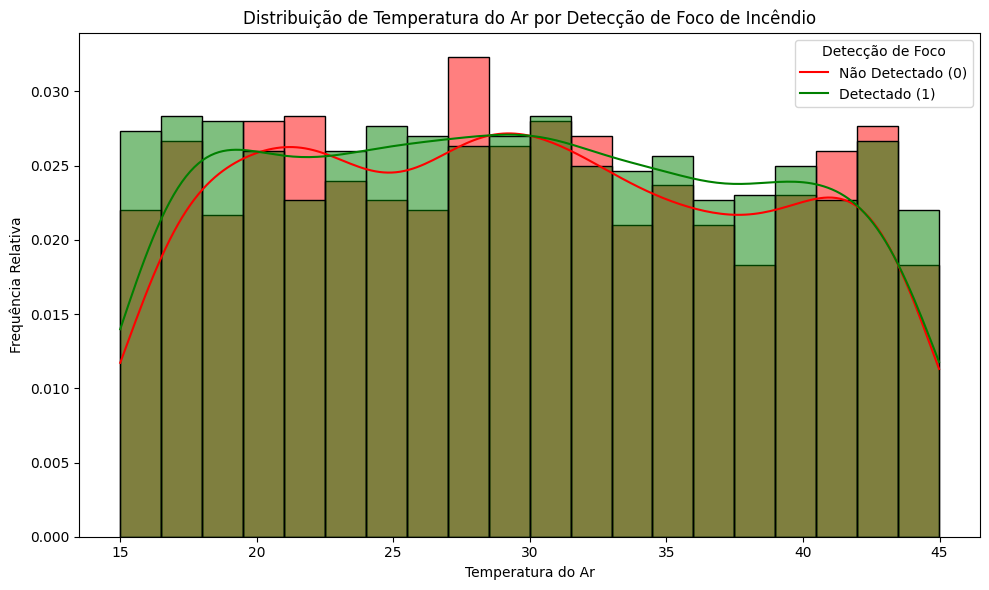

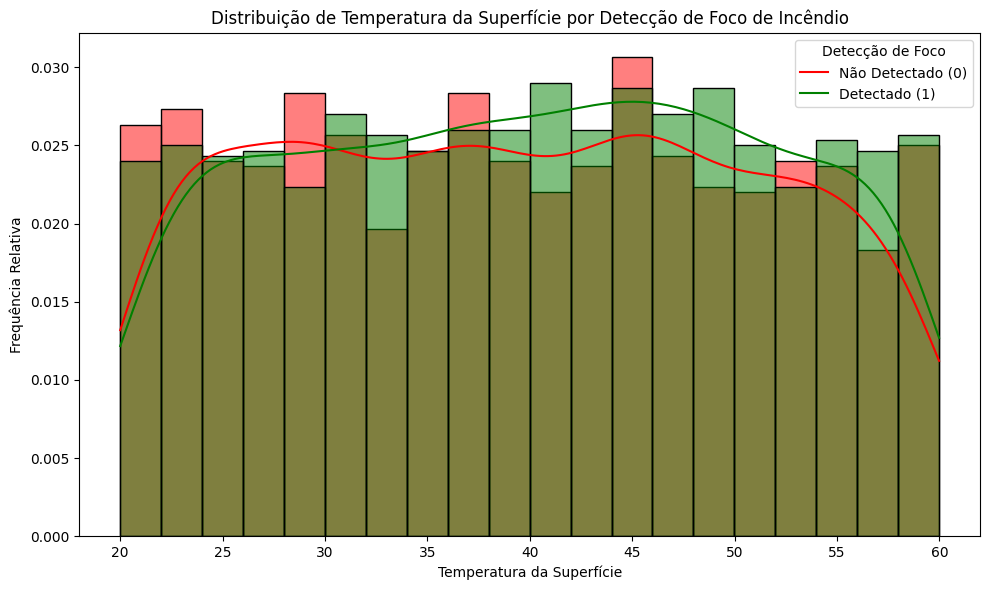

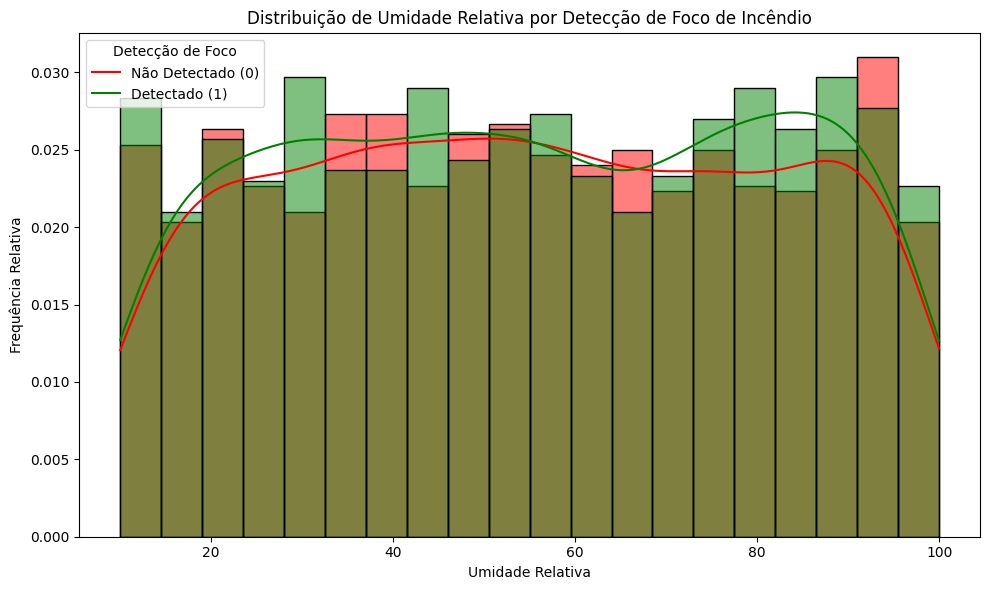

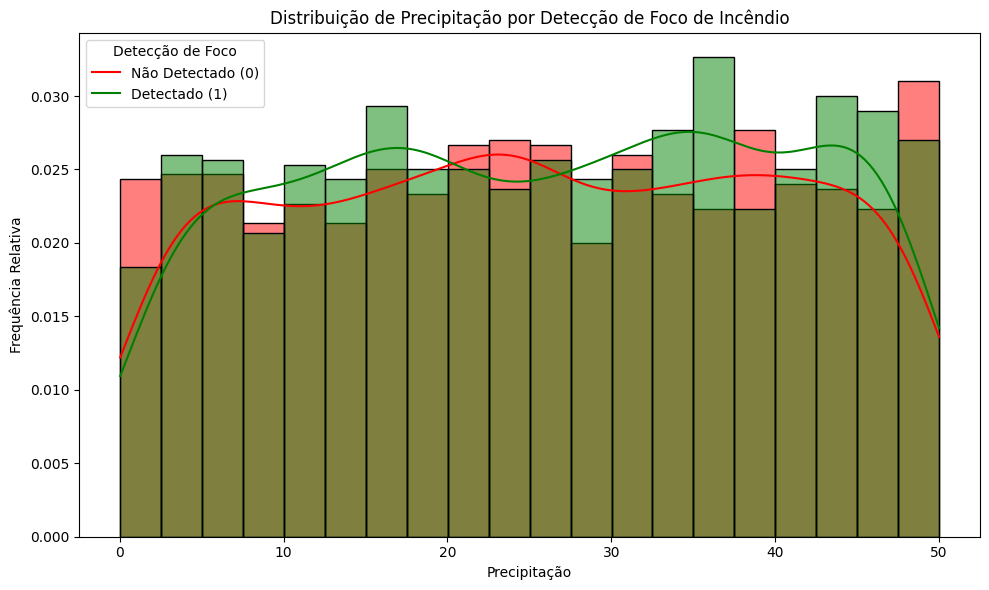

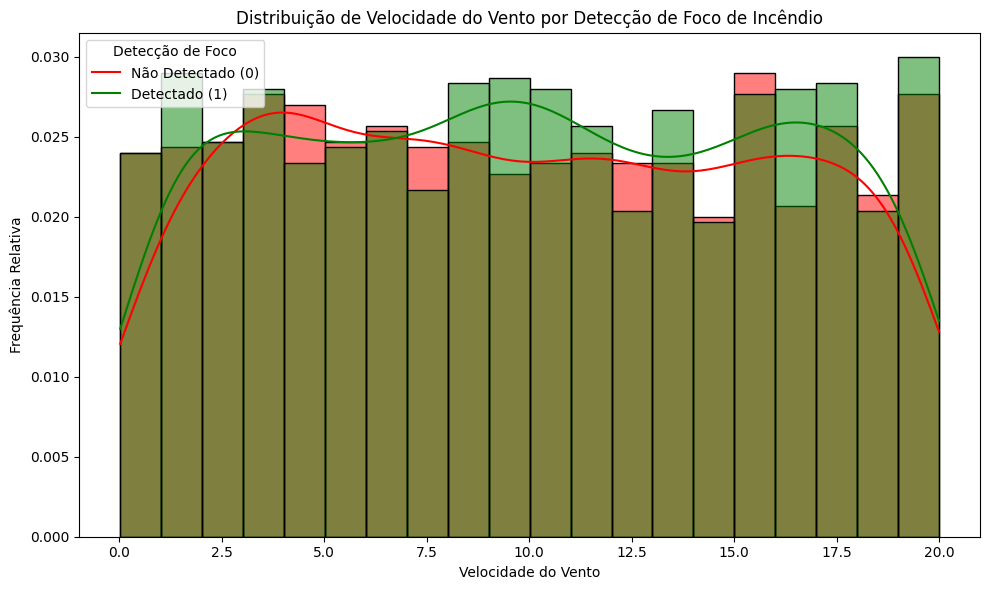

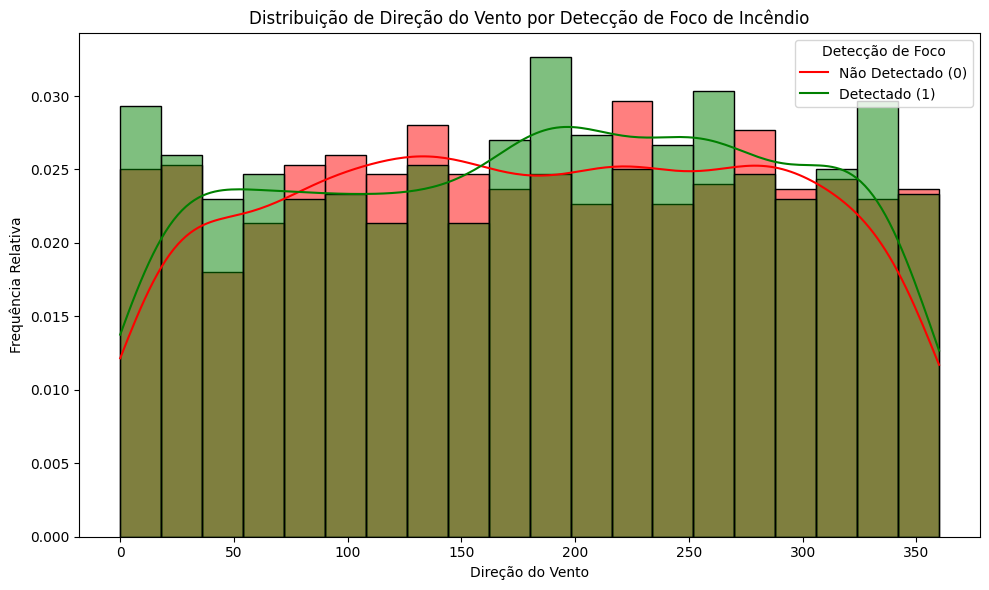

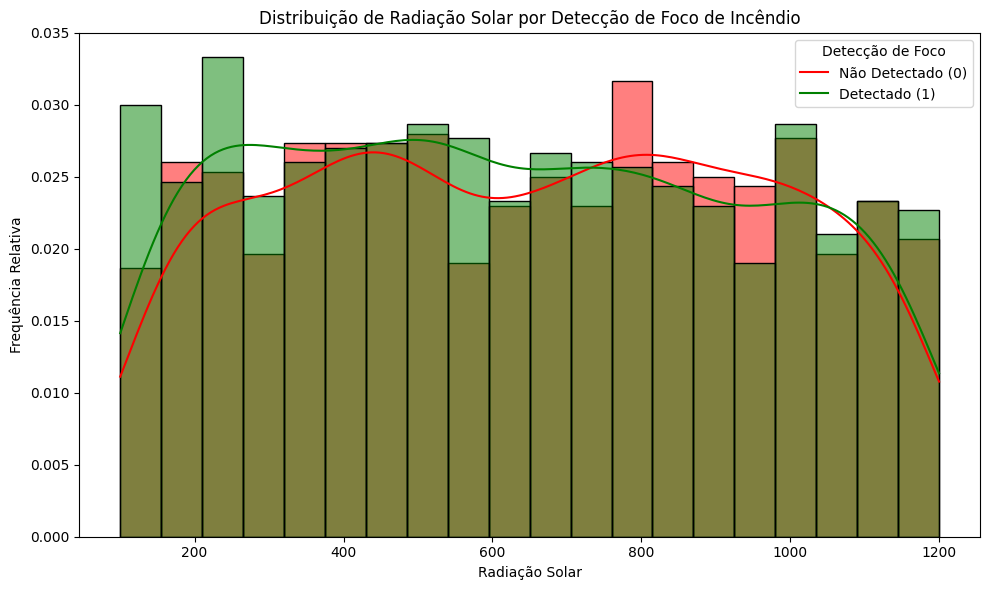

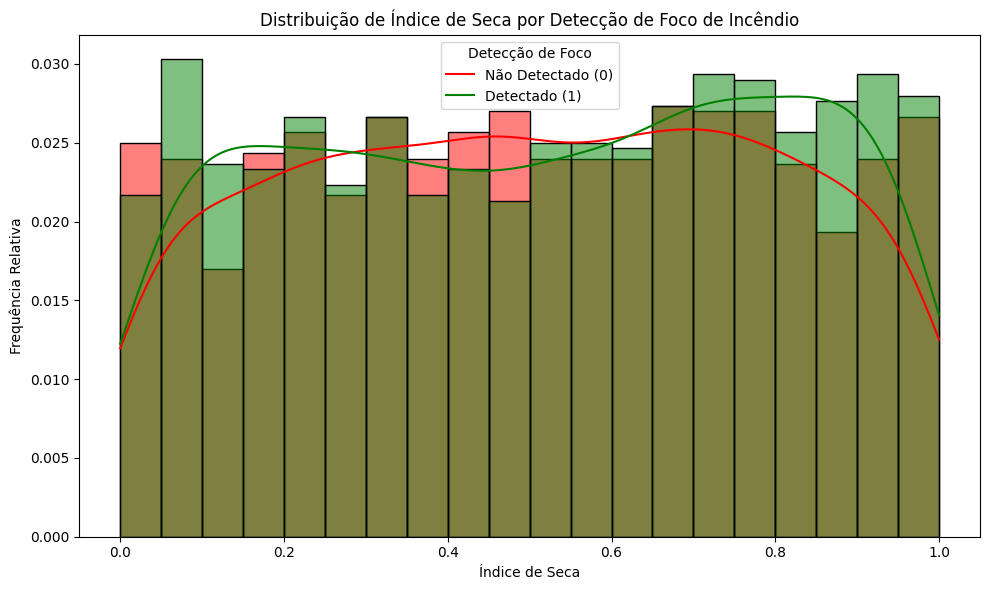

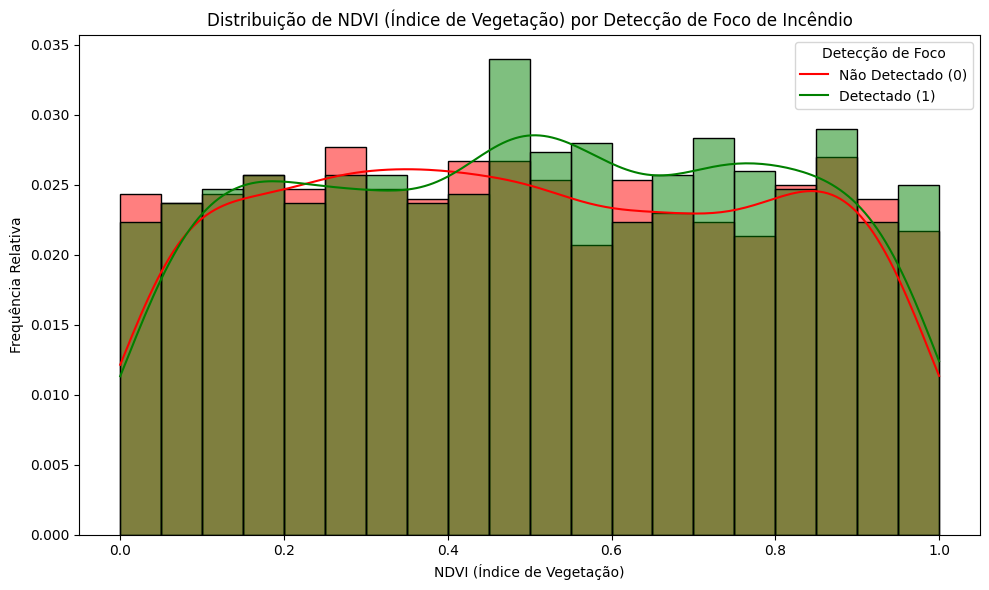

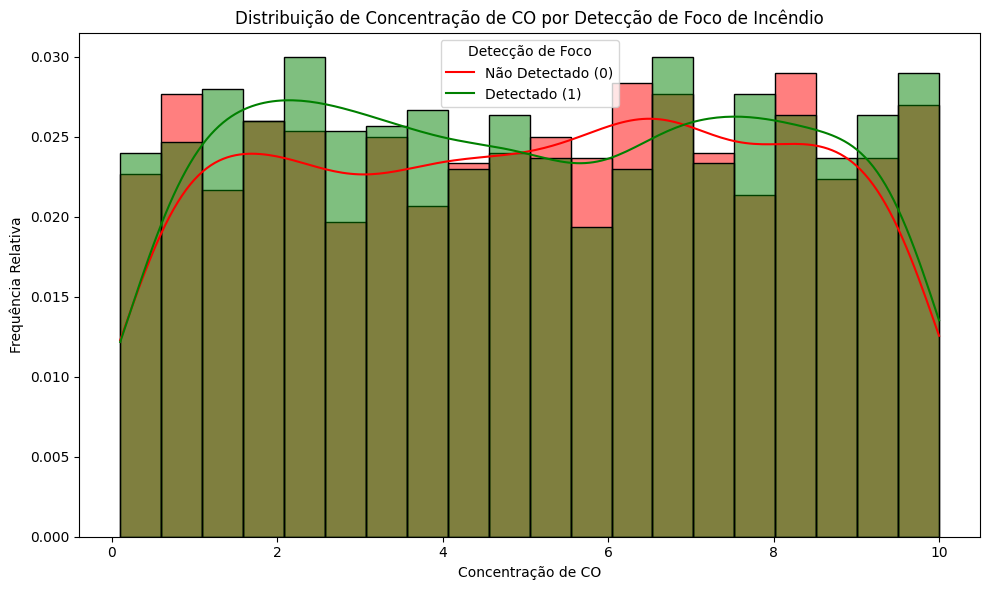

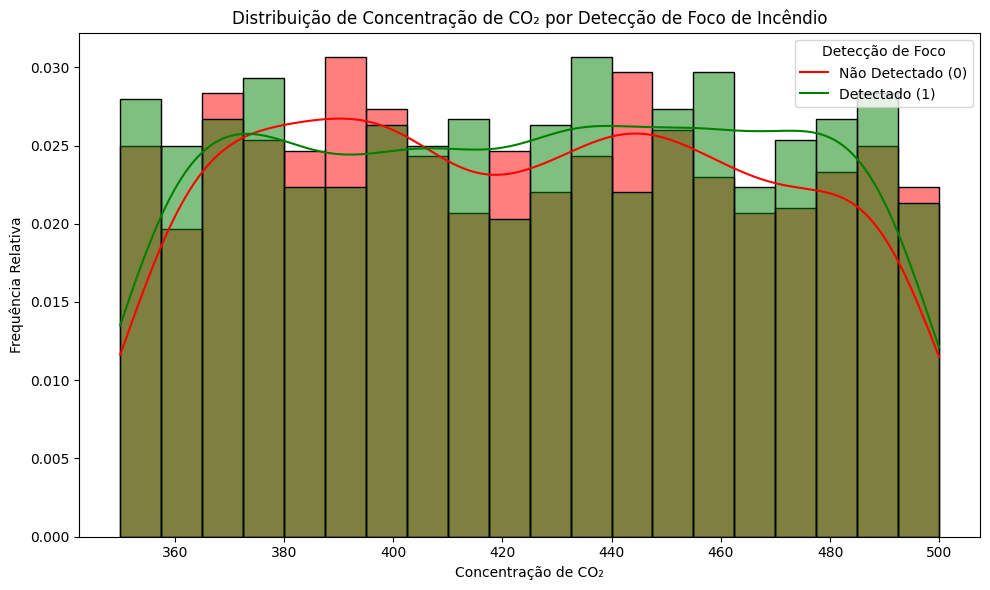

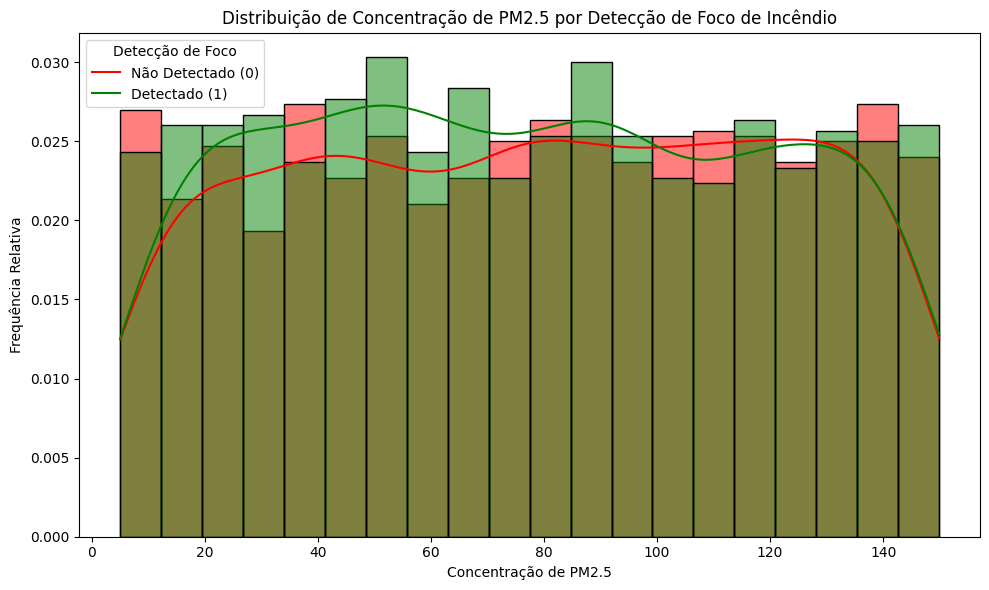

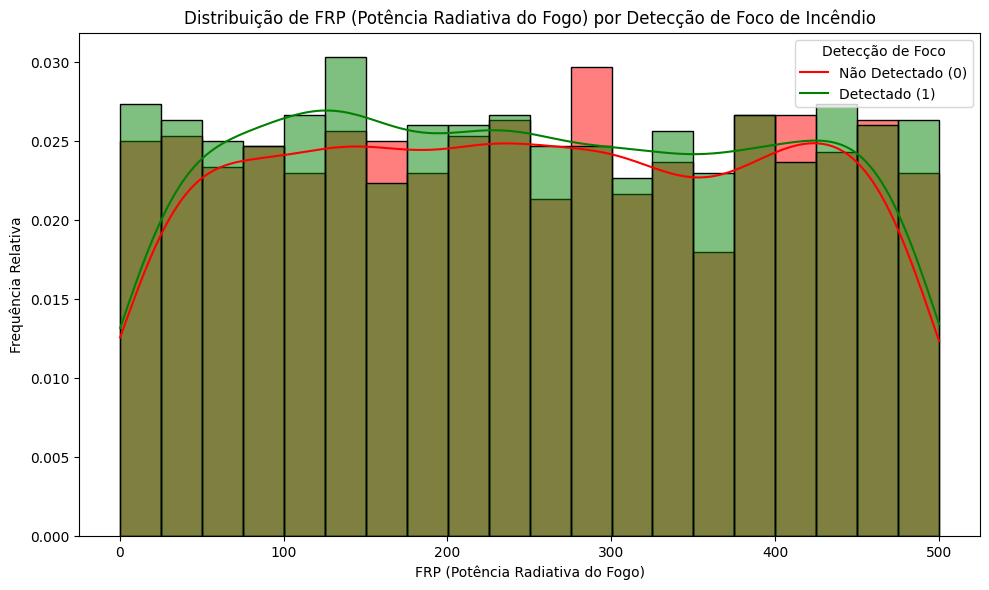



###  VARIÁVEIS RELACIONADAS AO FOCO DE INCÊNDIO

---

####  **Temperatura do Ar**

* **Média muito semelhante**: \~29,6 °C para ambos.
* **Sem diferenças significativas**, mas o grupo com incêndio tem leve tendência a temperaturas ligeiramente mais altas.
* **Conclusão**: Temperatura do ar **sozinha não diferencia** bem os focos.

---

####  **Temperatura da Superfície**

* **Sem foco**: média de **40,15 °C**
* **Com foco**: média de **39,52 °C**
* Um pouco **mais baixa nos locais com fogo** — o que é contraintuitivo, mas pode indicar **mudança após detecção** (ex: sensores pós-queima).
* **Conclusão**: A diferença não é forte o suficiente para indicar padrão.

---

####  **Umidade Relativa**

* Muito próxima: **55,3% (sem foco)** vs. **55,0% (com foco)**
* **Conclusão**: Umidade sozinha **não é decisiva**, mas pode contribuir se combinada com outros fatores.

---

####  **Precipitação**

* **Sem foco**: 25,9 mm
* **Com foco**: 25,4 mm
* Pouca diferença.
* **Conclusão**: Baixa influência isolada.

---

####  **Velocidade do Vento**

* **Sem foco**: 10,02 m/s
* **Com foco**: 9,91 m/s
* Pequena diferença negativa.
* **Conclusão**: Velocidade do vento **não muda significativamente** entre os grupos.

---

####  **Direção do Vento**

* Diferenças mínimas (\~181°)
* **Conclusão**: Sem impacto direto isolado.

---

####  **Radiação Solar**

* **Com foco**: 648 W/m² (maior)
* **Sem foco**: 626 W/m²
* **Conclusão**: Locais com foco tendem a receber **mais radiação solar**, o que pode favorecer o ressecamento e a ignição.

---

####  **Índice de Seca**

* **Sem foco**: 0,515
* **Com foco**: 0,506
* Leve queda com foco.
* **Conclusão**: Diferença fraca, mas pode ser útil em combinação com NDVI e radiação.

---

####  **NDVI (Índice de Vegetação)**

* **Sem foco**: 0,506
* **Com foco**: 0,494
* Leve redução com foco → indica **menor cobertura vegetal saudável** onde há incêndios.
* **Conclusão**: **NDVI mais baixo pode estar associado a áreas já degradadas ou mais secas.**

---

####  **Concentração de CO (Monóxido de Carbono)**

* **Com foco**: 5,10 ppm
* **Sem foco**: 5,05 ppm
* Um pouco **mais alto onde há fogo**, o que faz sentido.
* **Conclusão**: Potencial indicador de queima recente.

---

####  **Concentração de CO₂**

* Praticamente idêntico (\~424 ppm)
* **Conclusão**: Não mostra diferença expressiva entre os grupos.

---

####  **PM2.5 (Material particulado fino)**

* **Com foco**: 78,4 µg/m³
* **Sem foco**: 76,9 µg/m³
* Ligeiramente maior onde há incêndios, o que é **esperado**, já que o fogo emite material particulado.
* **Conclusão**: Boa variável indicativa, especialmente em conjunto com CO.

---

####  **FRP (Potência Radiativa do Fogo)**

* **Com foco**: 249,8
* **Sem foco**: 248,5
* Muito parecido, com **média ligeiramente superior onde há foco**.
* **Conclusão**: Pequena diferença, mas FRP tende a acompanhar o registro de fogo.

---

###  **Conclusão Geral da Análise**

* A **maior parte das variáveis não apresenta diferenças extremas**, indicando que **o foco de incêndio pode depender de combinações de variáveis**, não de valores isolados.

* **Variáveis com potencial preditivo maior**:

  *  **NDVI mais baixo**
  *  **Radiação solar mais alta**
  * ⚫ **Maior PM2.5 e CO**

* **Temperatura, umidade, chuva e vento** não se destacam sozinhos, mas **combinados podem ser úteis**.

---


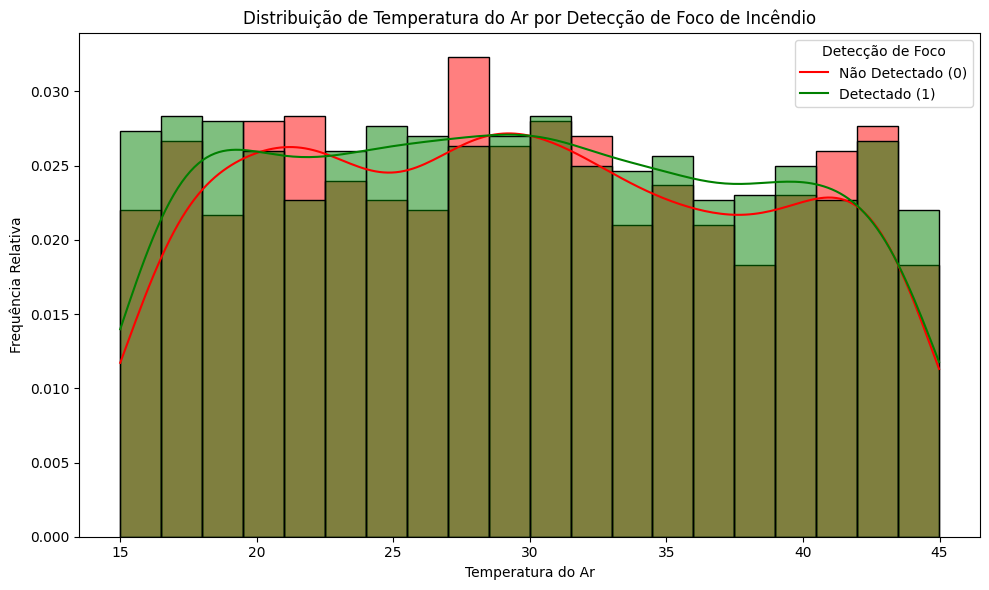

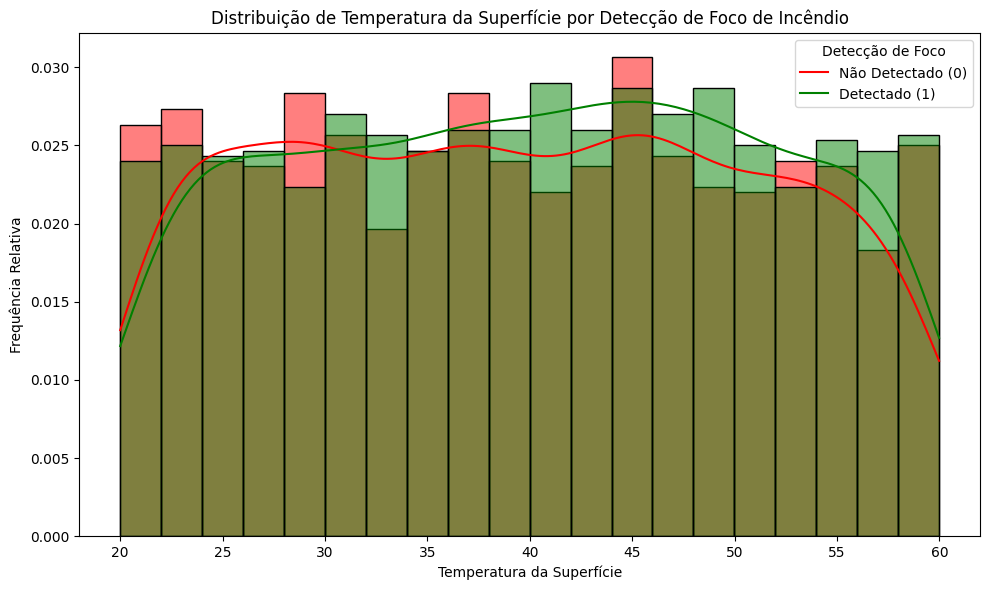

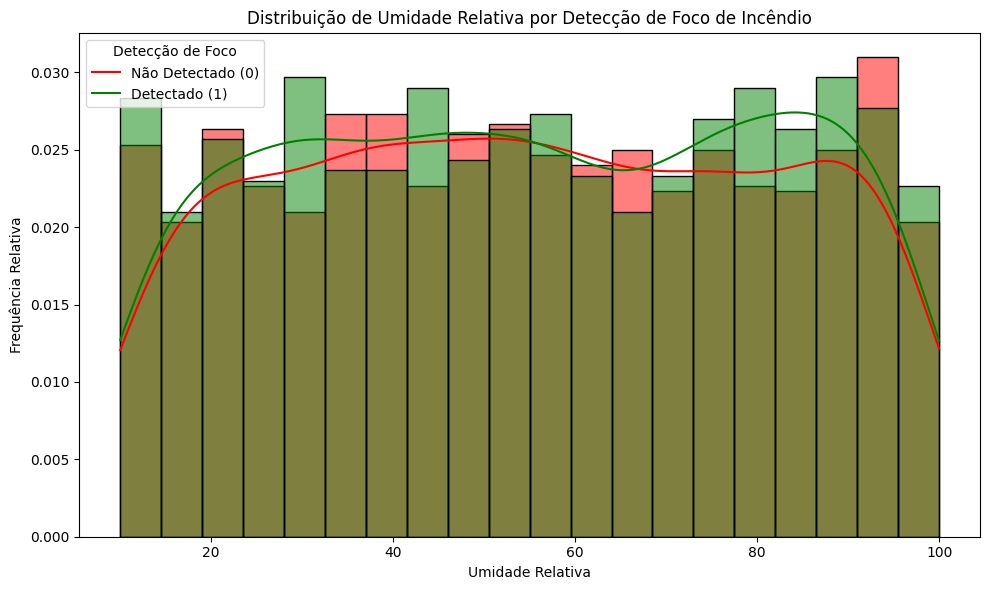

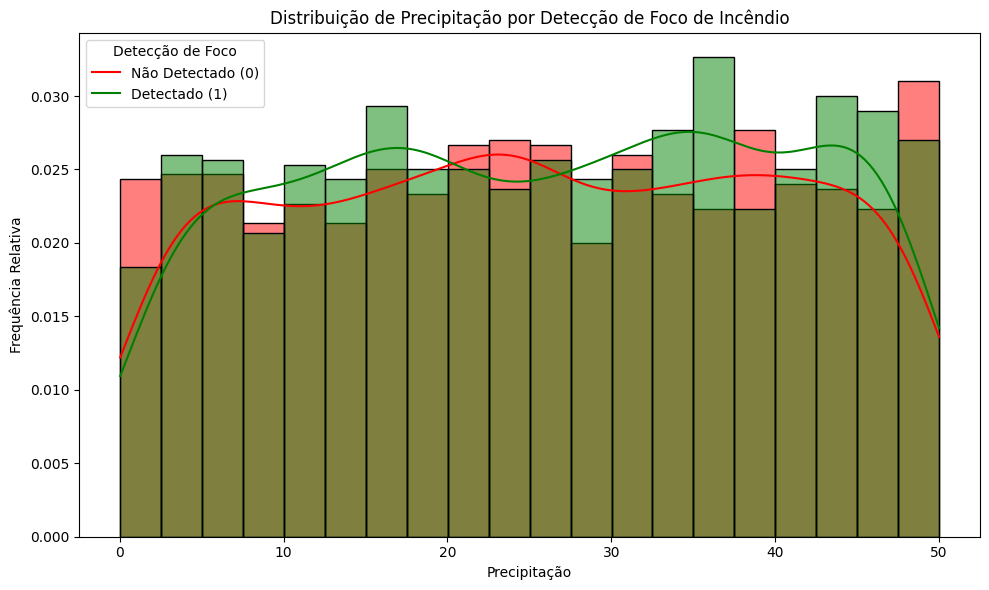

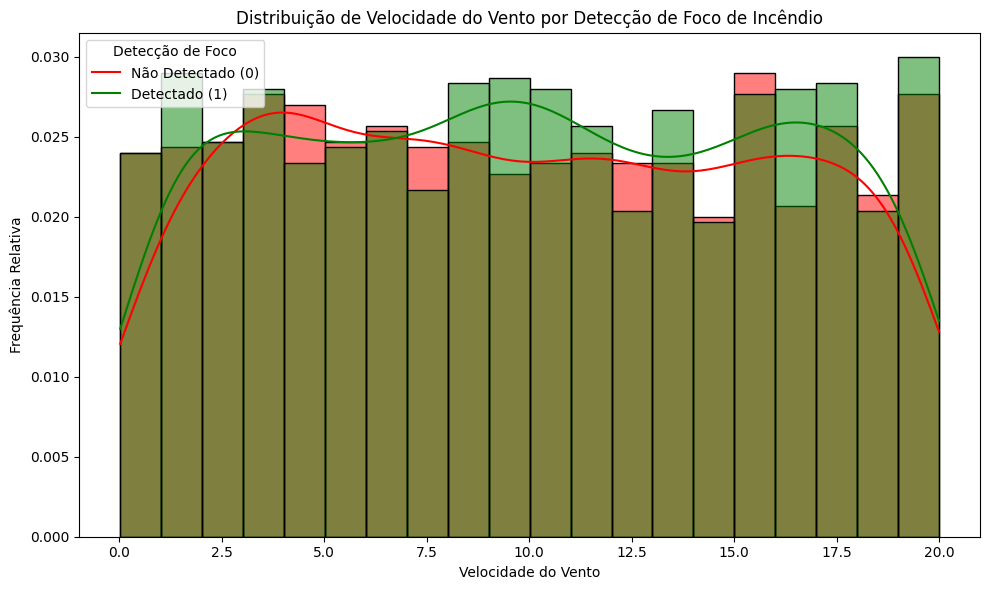

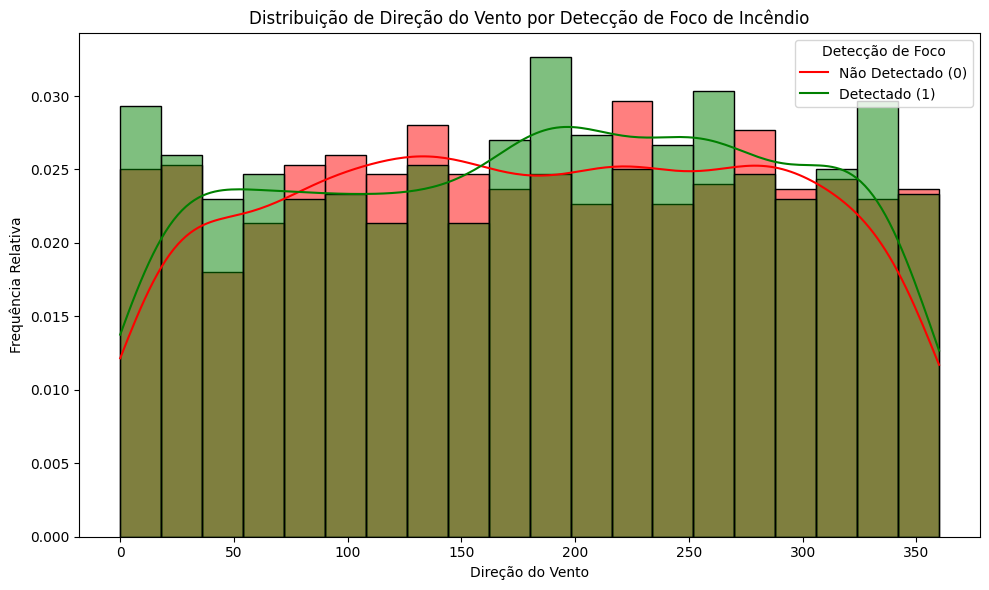

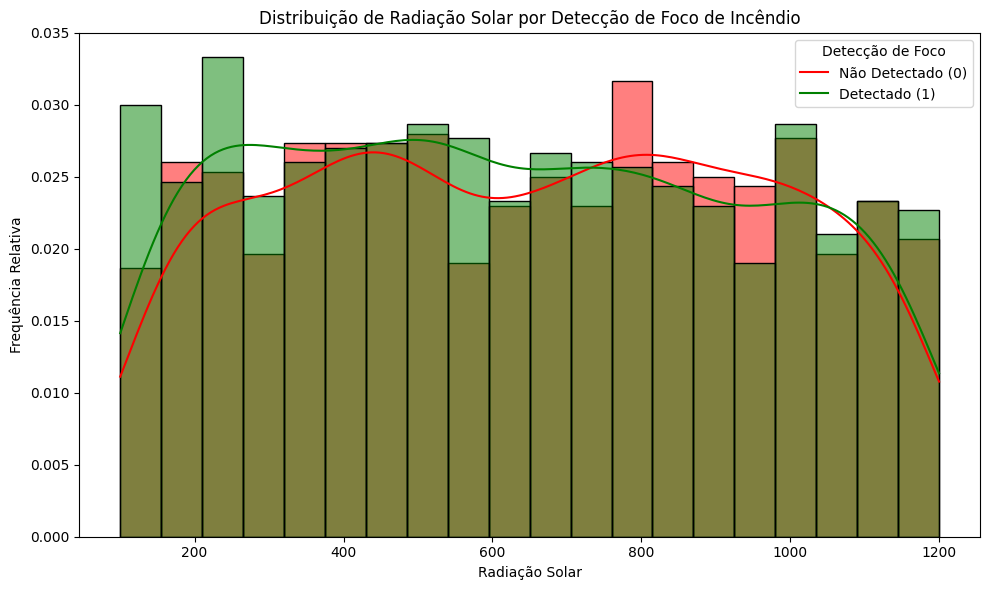

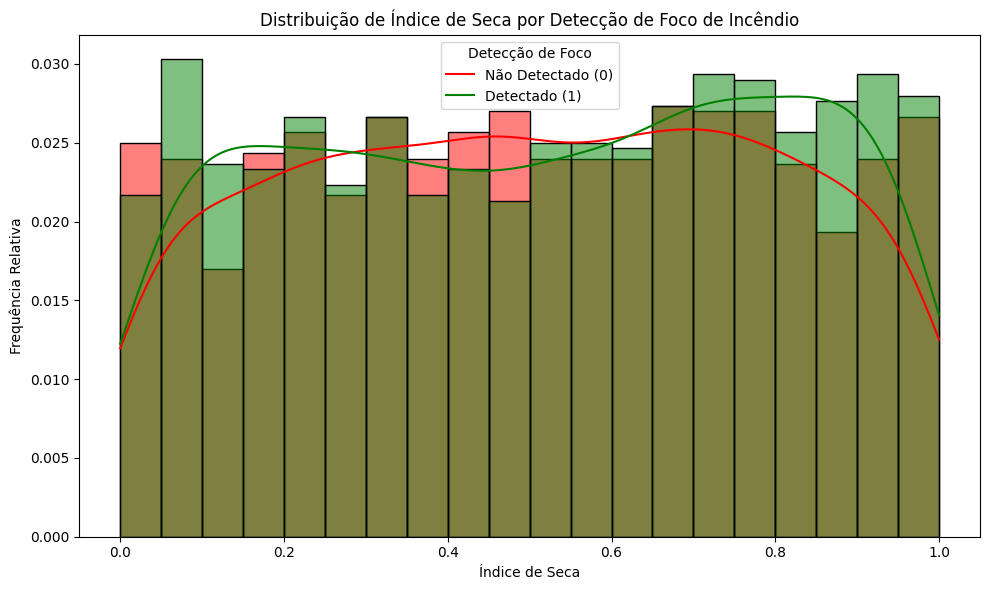

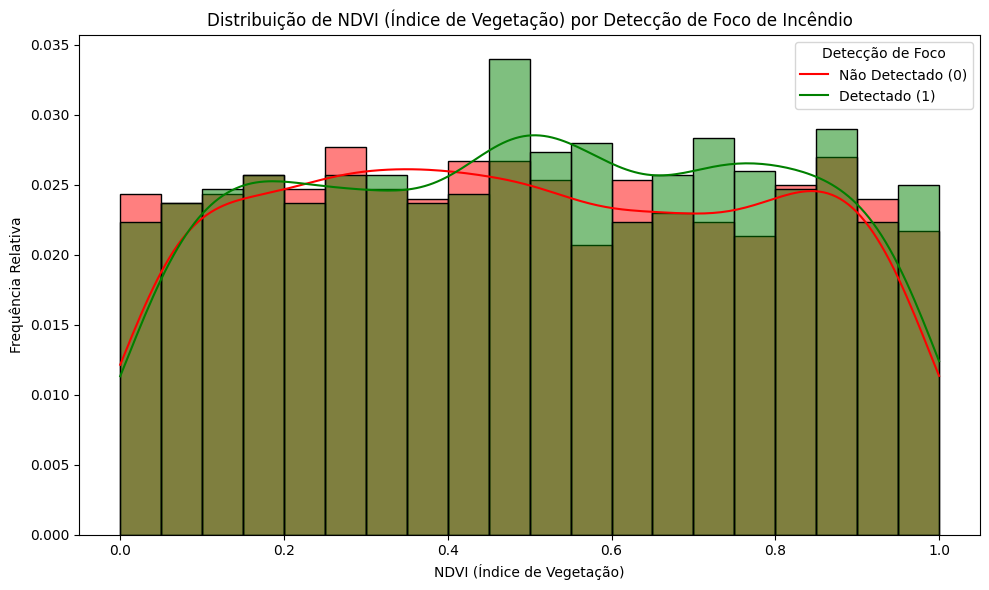

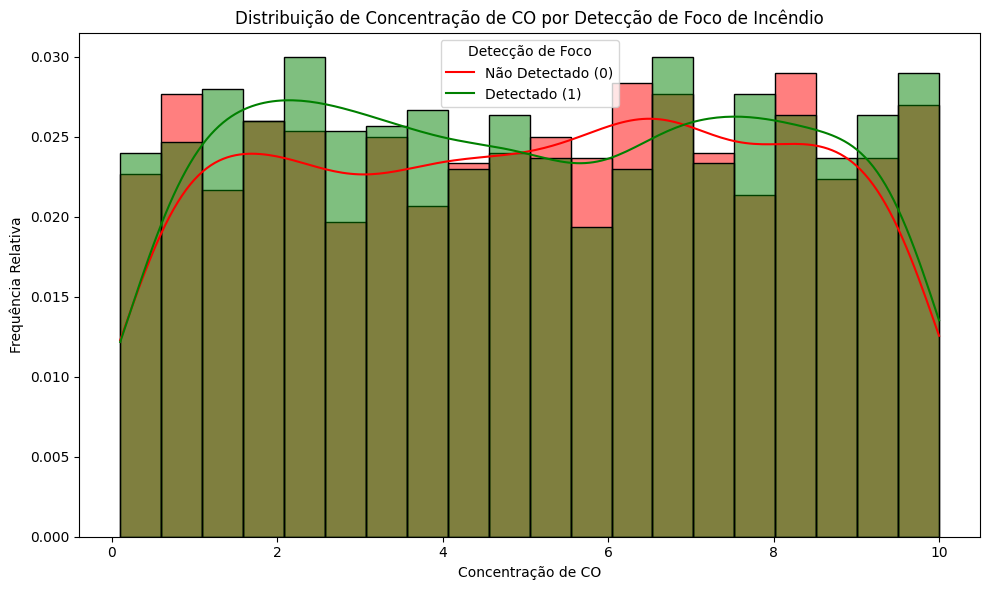

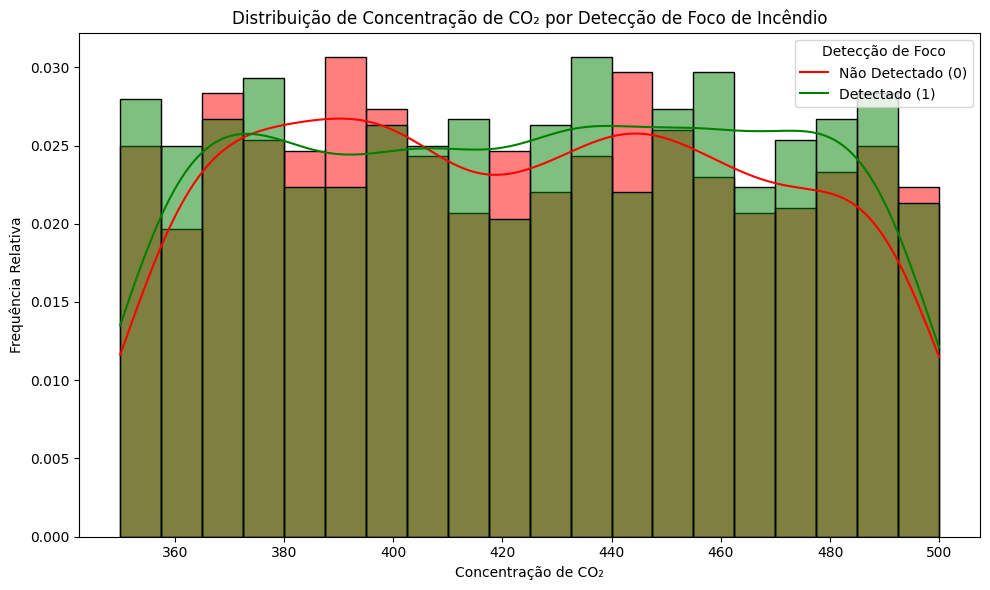

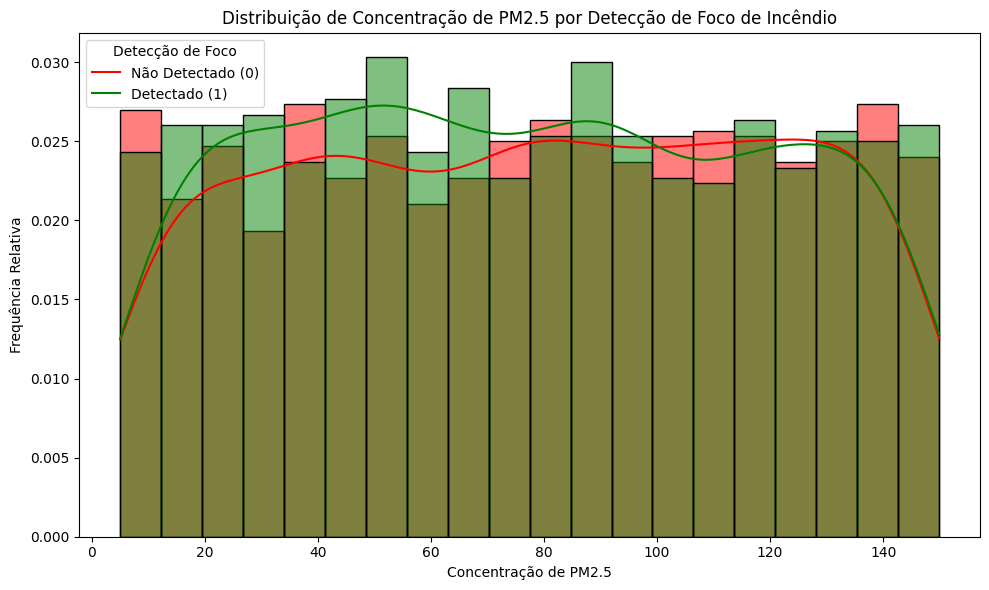

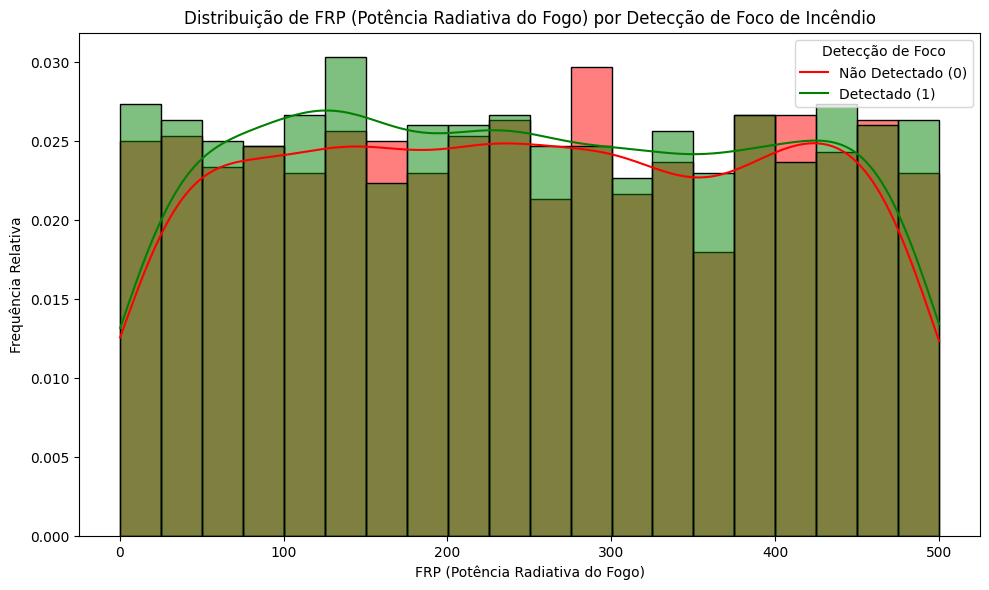

In [11]:


# Dicionário com variáveis e seus nomes bonitos para título/eixos
variaveis = {
    "temperatura_ar": "Temperatura do Ar",
    "temperatura_superficie": "Temperatura da Superfície",
    "umidade_relativa": "Umidade Relativa",
    "precipitacao": "Precipitação",
    "velocidade_vento": "Velocidade do Vento",
    "direcao_vento": "Direção do Vento",
    "radiacao_solar": "Radiação Solar",
    "indice_seca": "Índice de Seca",
    "indice_vegetacao_ndvi": "NDVI (Índice de Vegetação)",
    "concentracao_CO": "Concentração de CO",
    "concentracao_CO2": "Concentração de CO₂",
    "concentracao_PM25": "Concentração de PM2.5",
    "frp": "FRP (Potência Radiativa do Fogo)"
}

# Loop para plotar cada variável
for var, nome in variaveis.items():
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=var, hue="deteccao_foco", bins=20, kde=True, stat="probability", palette=["green", "red"], alpha=0.5)
    plt.title(f"Distribuição de {nome} por Detecção de Foco de Incêndio")
    plt.xlabel(nome)
    plt.ylabel("Frequência Relativa")
    plt.legend(title="Detecção de Foco", labels=["Não Detectado (0)", "Detectado (1)"])
    plt.tight_layout()
    plt.show()


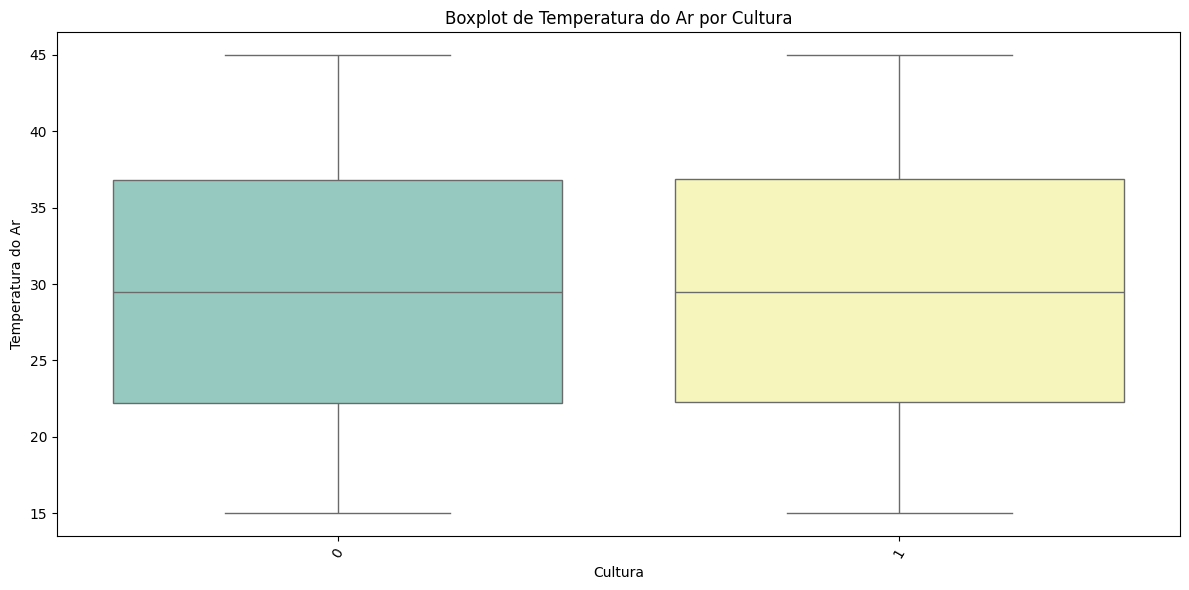

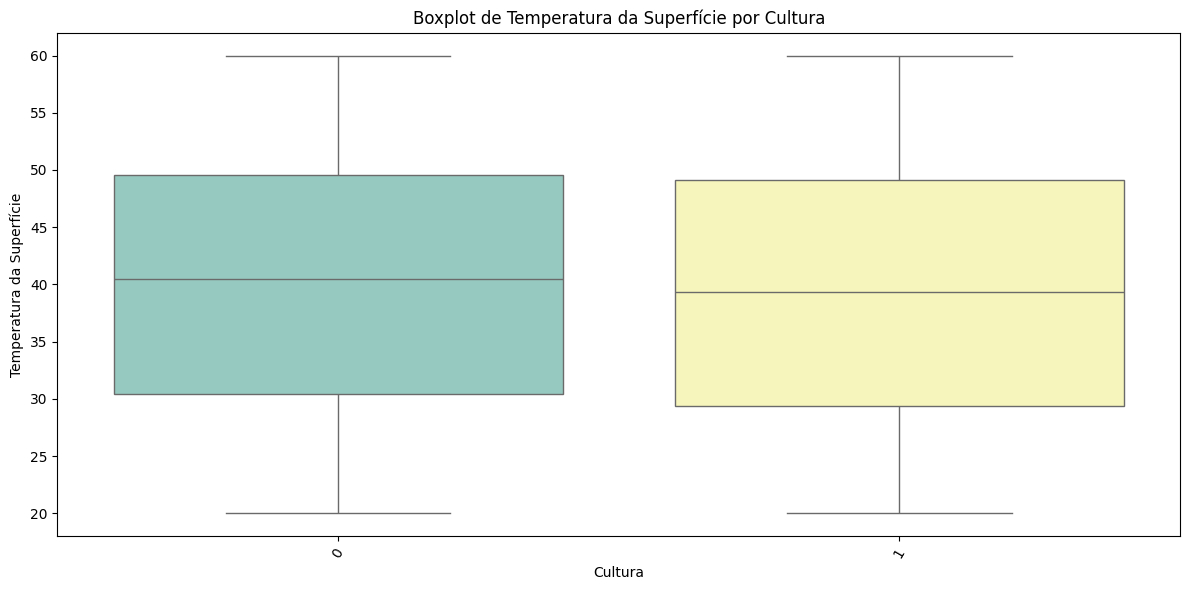

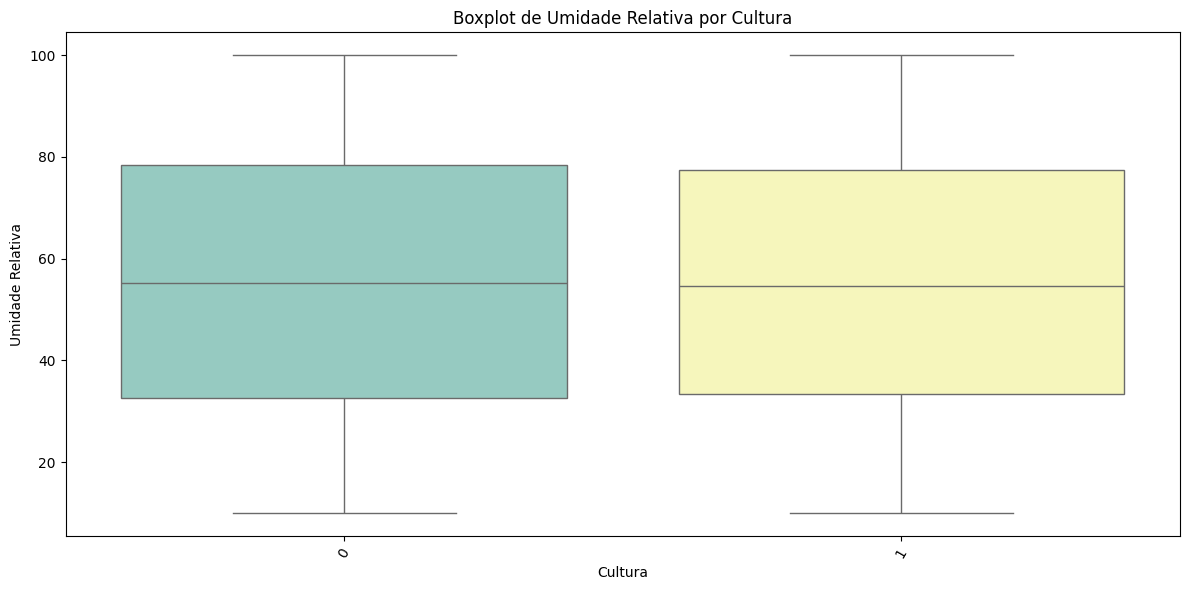

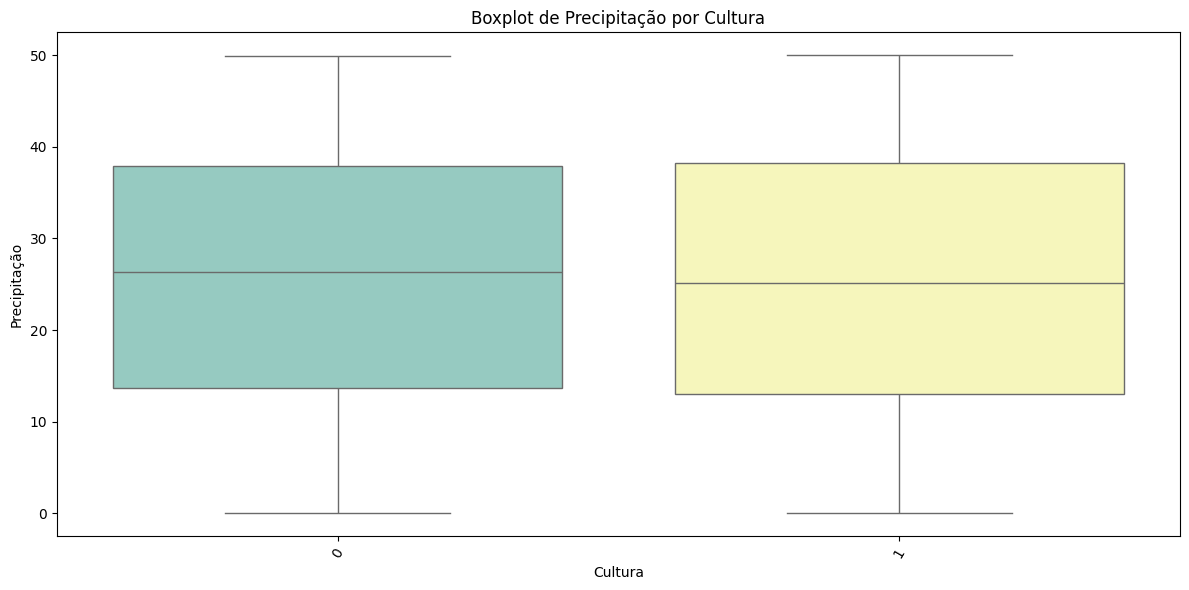

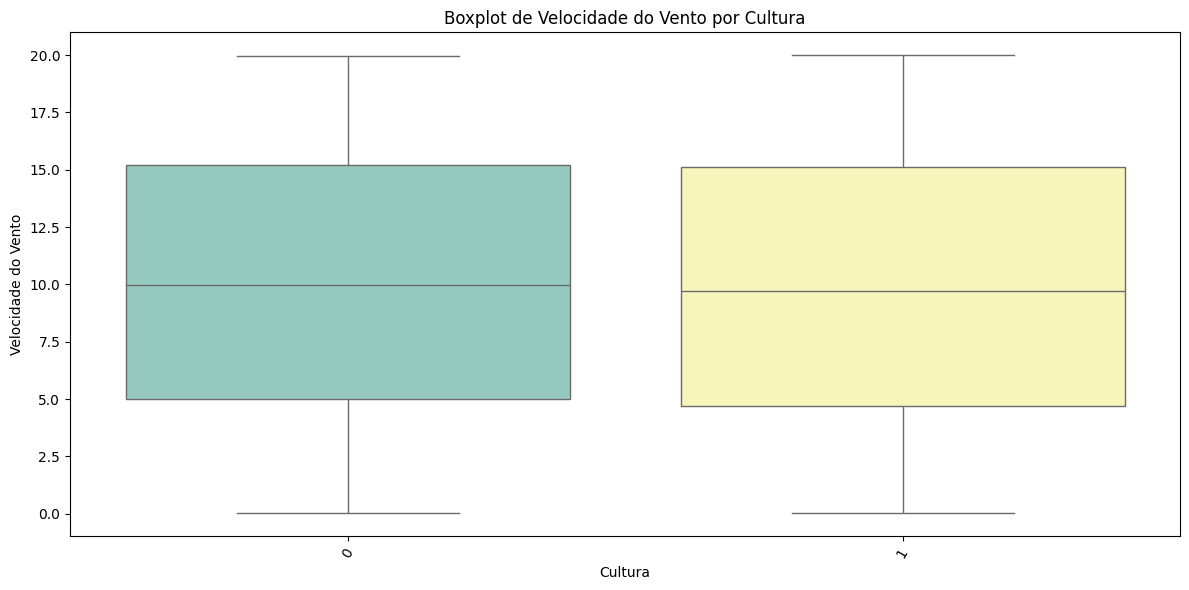

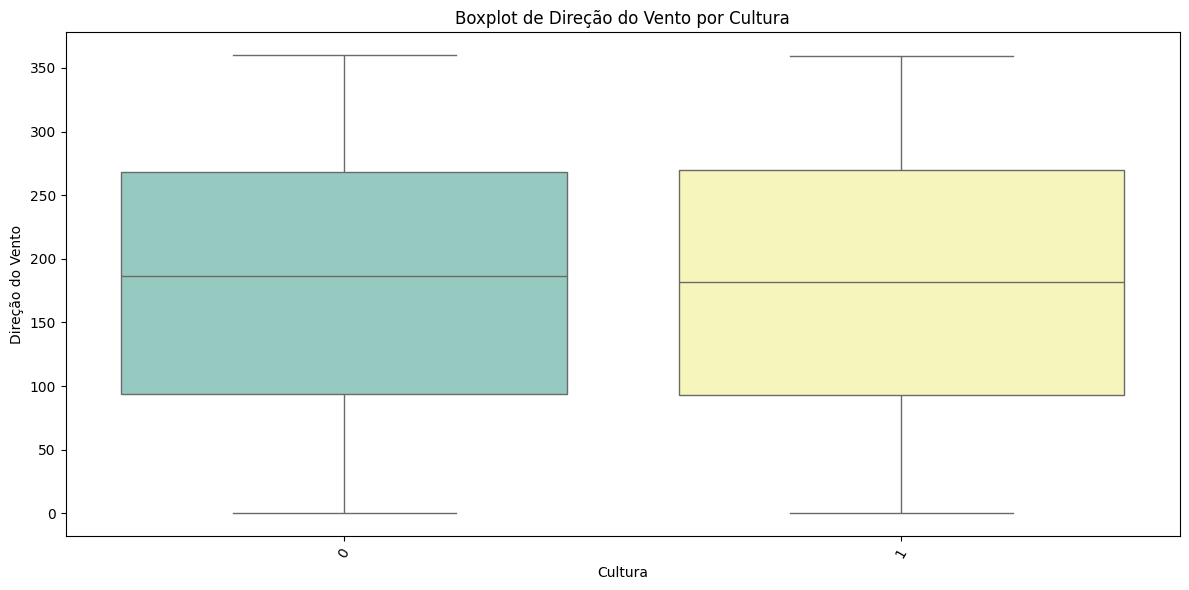

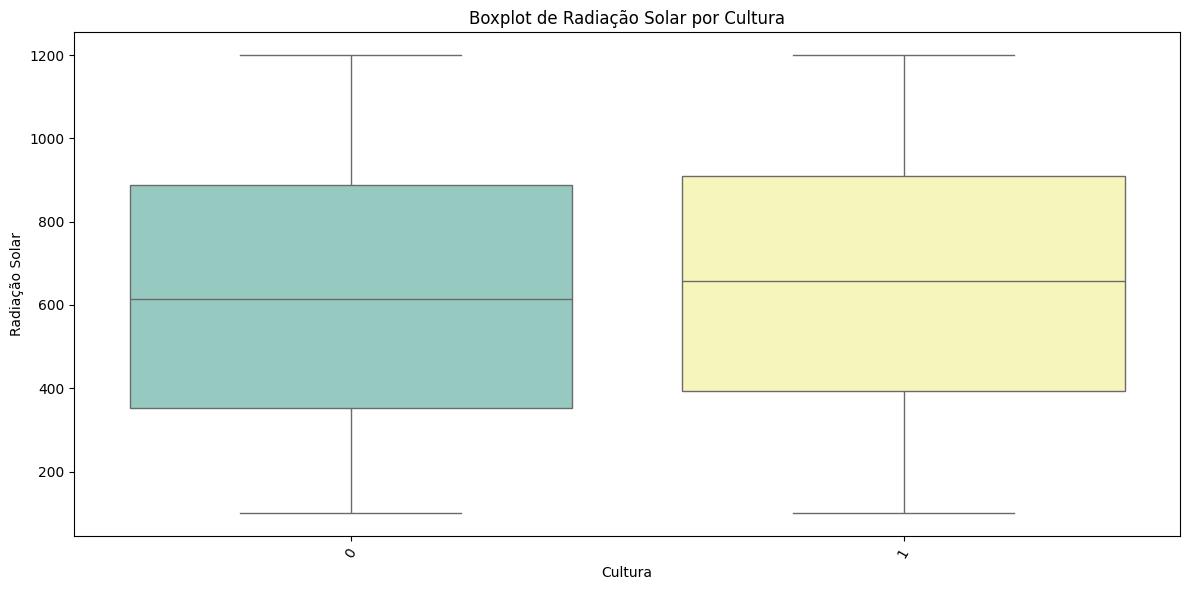

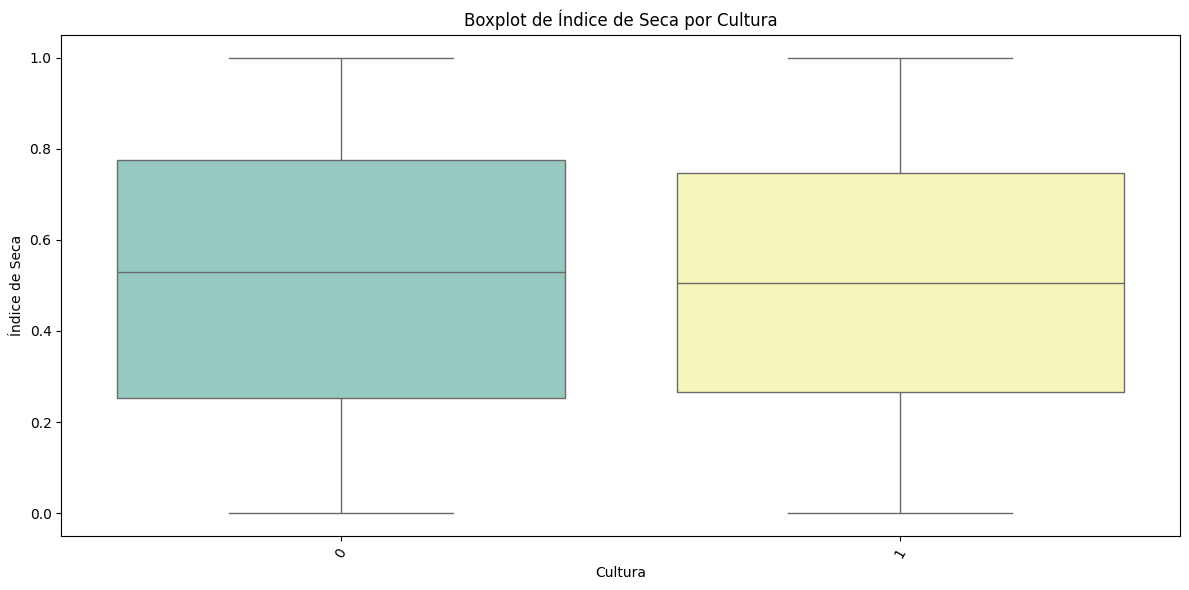

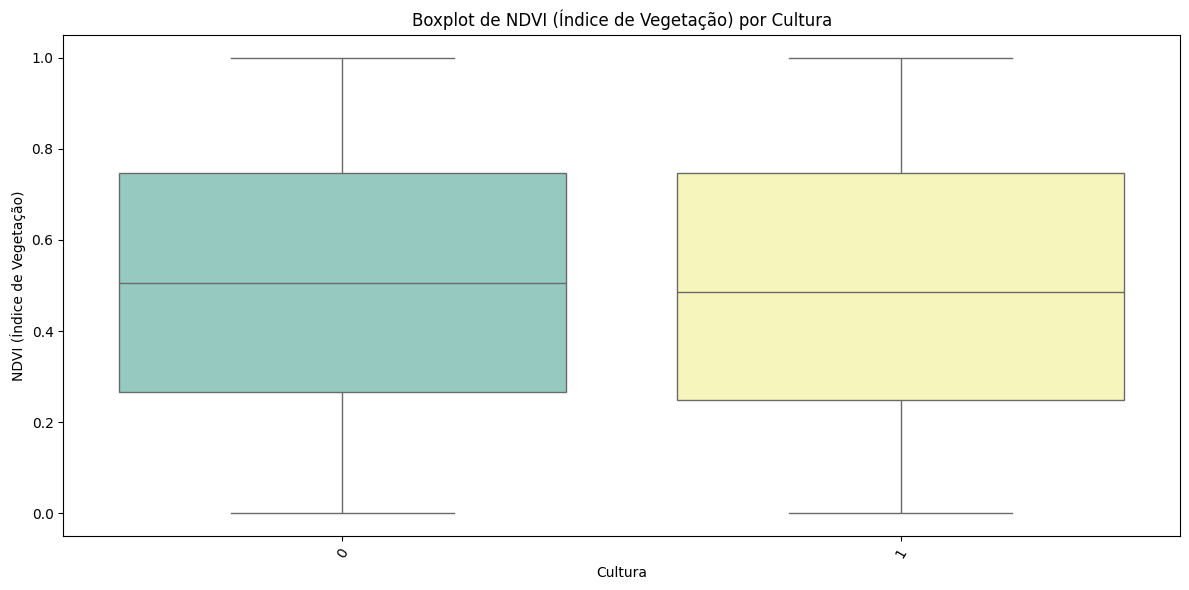

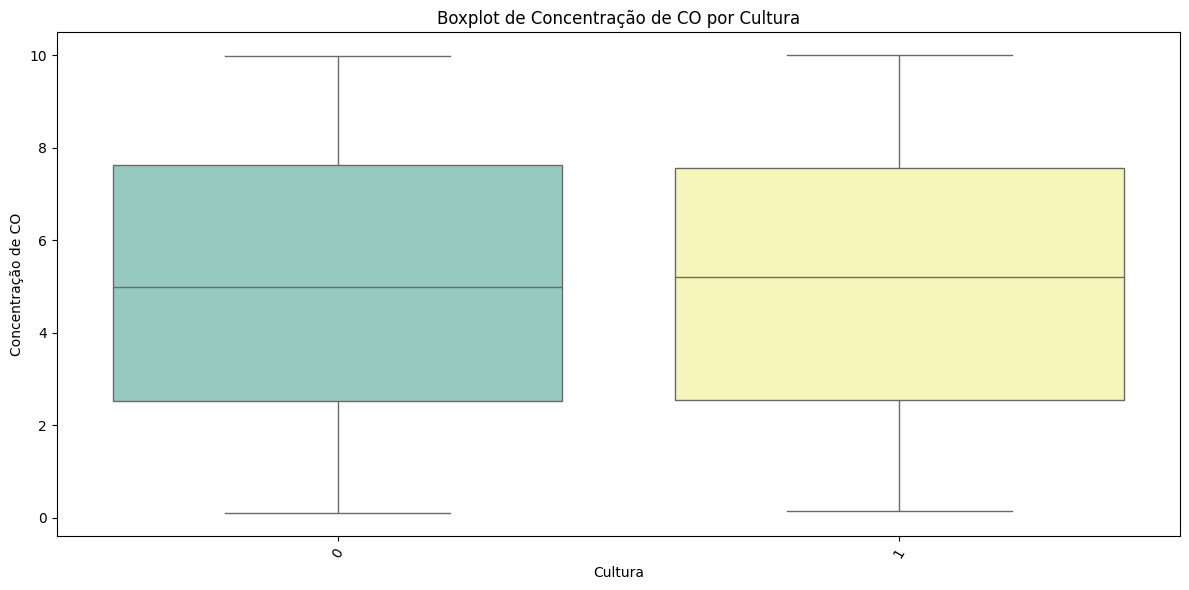

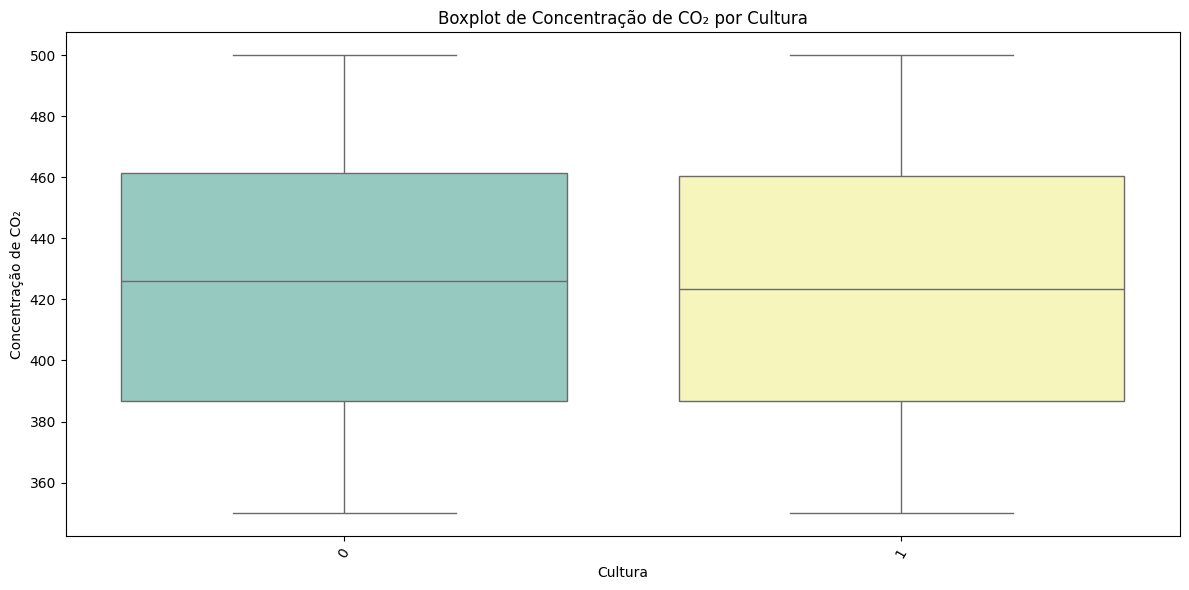

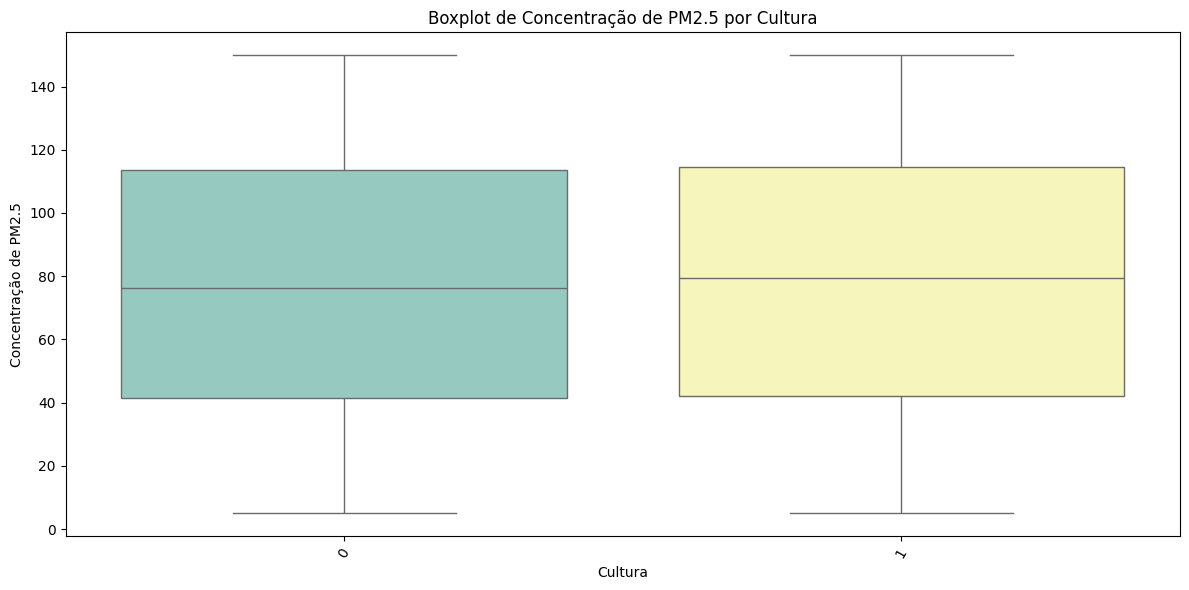

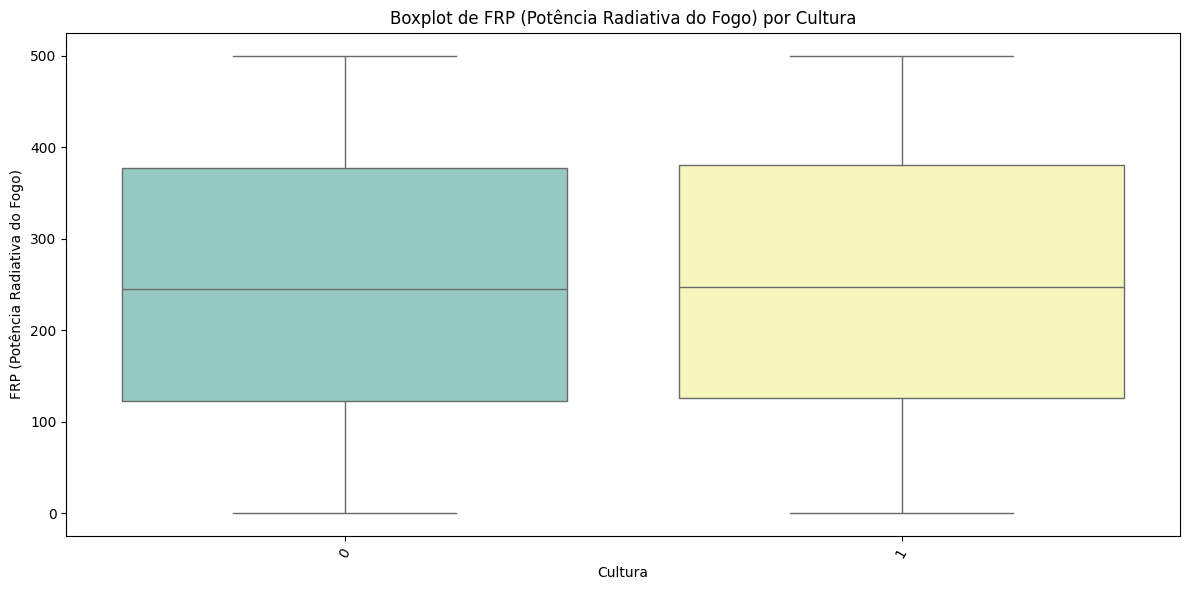

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis = {
    "temperatura_ar": "Temperatura do Ar",
    "temperatura_superficie": "Temperatura da Superfície",
    "umidade_relativa": "Umidade Relativa",
    "precipitacao": "Precipitação",
    "velocidade_vento": "Velocidade do Vento",
    "direcao_vento": "Direção do Vento",
    "radiacao_solar": "Radiação Solar",
    "indice_seca": "Índice de Seca",
    "indice_vegetacao_ndvi": "NDVI (Índice de Vegetação)",
    "concentracao_CO": "Concentração de CO",
    "concentracao_CO2": "Concentração de CO₂",
    "concentracao_PM25": "Concentração de PM2.5",
    "frp": "FRP (Potência Radiativa do Fogo)"
}

for var, nome in variaveis.items():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="deteccao_foco", y=var, palette="Set3")
    plt.title(f"Boxplot de {nome} por Cultura")
    plt.xlabel("Cultura")
    plt.ylabel(nome)
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()


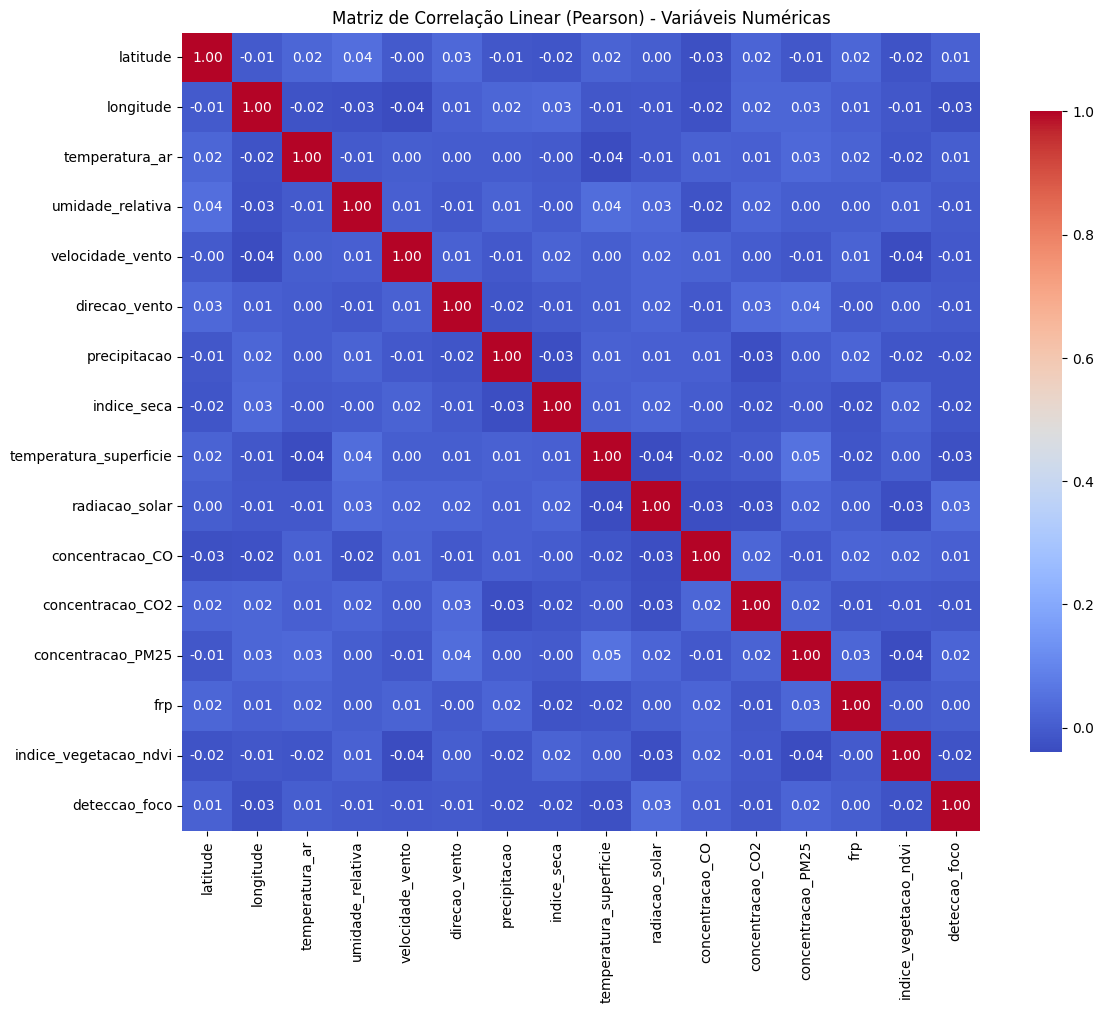

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona apenas as colunas numéricas (incluindo deteccao_foco)
df_numerico = df.select_dtypes(include=["float64", "int64"])

# Calcula a matriz de correlação
correlacao = df_numerico.corr()

# Exibe a matriz como um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação Linear (Pearson) - Variáveis Numéricas")
plt.tight_layout()
plt.show()


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


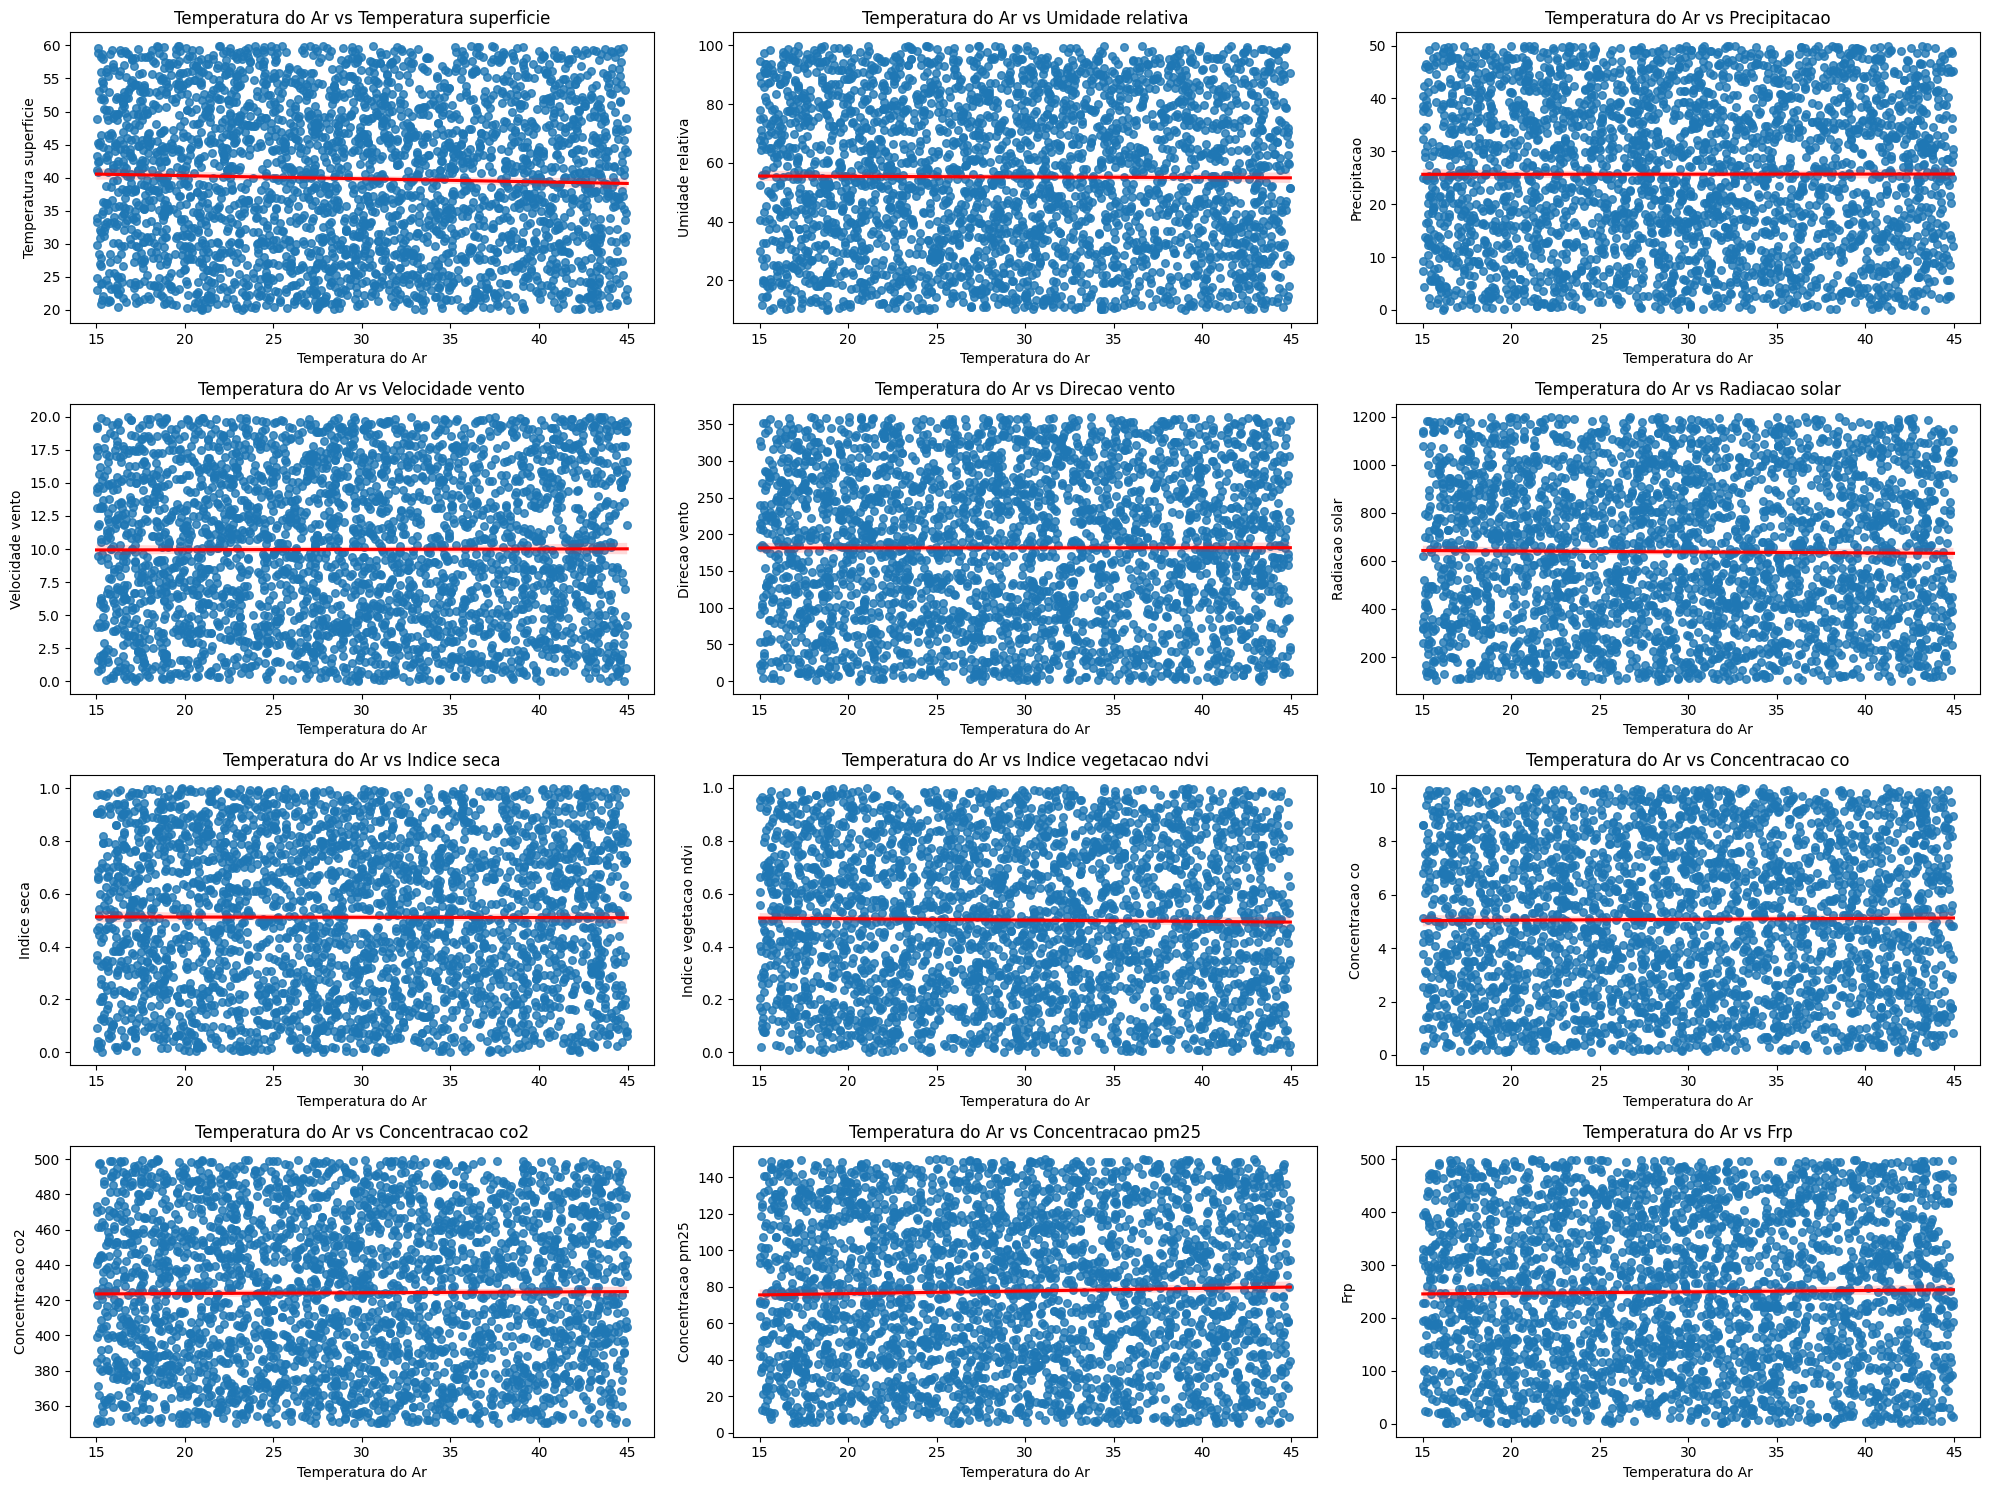

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis = [
    "temperatura_ar",
    "temperatura_superficie",
    "umidade_relativa",
    "precipitacao",
    "velocidade_vento",
    "direcao_vento",
    "radiacao_solar",
    "indice_seca",
    "indice_vegetacao_ndvi",
    "concentracao_CO",
    "concentracao_CO2",
    "concentracao_PM25",
    "frp"
]

# Exemplo: analisar regressão linear entre temperatura do ar e outras variáveis
plt.figure(figsize=(20, 15))

for i, var in enumerate(variaveis[1:], start=1):  # relaciona temperatura_ar com as outras variáveis
    plt.subplot(4, 3, i)
    sns.regplot(data=df, x="temperatura_ar", y=var, scatter_kws={"s": 30}, line_kws={"color": "red"})
    plt.title(f"Temperatura do Ar vs {var.replace('_', ' ').capitalize()}")
    plt.xlabel("Temperatura do Ar")
    plt.ylabel(var.replace('_', ' ').capitalize())

plt.tight_layout()
plt.show()


<a id='4'></a>
## **4. Modelagem Preditiva**

<a id='41'></a>
### **4.1. Separação dos Modelos para Treino e Teste**

In [19]:
# Selecionar variáveis que serão usadas como features (excluindo 'deteccao_foco' e colunas categóricas, se houver)
features = [
    "temperatura_ar",
    "umidade_relativa",
    "precipitacao",
    "velocidade_vento",
    "direcao_vento",
    "radiacao_solar",
    "indice_seca",
    "indice_vegetacao_ndvi",
    "concentracao_CO",
    "concentracao_CO2",
    "concentracao_PM25",
    "frp"
]

X = df[features]
y = df["deteccao_foco"]

# Dividir dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar as variáveis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id='42'></a>
### **4.2 Regressão Logística**

A regressão logística está sendo utilizada para classificar a presença ou ausência de focos de incêndio (`deteccao_foco`), com base em variáveis ambientais e atmosféricas como temperatura do ar, umidade relativa, precipitação, velocidade e direção do vento, radiação solar, índice de seca, índice de vegetação (NDVI), além da concentração de poluentes como CO, CO₂, PM2.5 e a potência radiativa do fogo (FRP).

O modelo de regressão logística aprende a relação entre essas variáveis ambientais e a ocorrência de focos, capturando padrões que indicam condições propícias para incêndios. Por exemplo, combinações específicas de alta temperatura, baixa umidade, altos índices de seca e certas concentrações de poluentes podem aumentar a probabilidade de detecção de um foco.

Com isso, a regressão logística permite prever, para novas observações, a probabilidade de ocorrência de incêndios, o que auxilia na tomada de decisão para ações preventivas e monitoramento ambiental. Além disso, por ser um modelo interpretável, podemos entender quais variáveis influenciam mais a probabilidade de focos, ajudando a priorizar esforços e recursos para o combate e prevenção de incêndios.

In [20]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliar desempenho do modelo
print(classification_report(y_test, y_pred, target_names=["Sem Foco", "Com Foco"]))

              precision    recall  f1-score   support

    Sem Foco       0.52      0.65      0.58       307
    Com Foco       0.50      0.36      0.42       293

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.50       600
weighted avg       0.51      0.51      0.50       600



<a id='43'></a>
### **4.3. Árvore de Decisão**


In [21]:
# Criar e treinar o modelo de Árvore de Decisão
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)

# Prever no conjunto de teste
y_pred = model_dt.predict(X_test_scaled)

# Gerar e imprimir relatório de classificação
report_dt = classification_report(y_test, y_pred)
print(report_dt)

              precision    recall  f1-score   support

           0       0.49      0.46      0.47       307
           1       0.47      0.50      0.48       293

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600



<a id='44'></a>
### **4.4. Floresta Aleatória**

In [22]:
# Criar e treinar o modelo de Floresta Aleatória
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Prever no conjunto de teste
y_pred = model_rf.predict(X_test_scaled)

# Gerar e imprimir relatório de classificação
report_rf = classification_report(y_test, y_pred)
print(report_rf)

              precision    recall  f1-score   support

           0       0.49      0.54      0.51       307
           1       0.47      0.42      0.44       293

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600



<a id='44'></a>
### **4.5. K-Nearest Neighbors (KNN)**

In [24]:
# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prever no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Gerar e imprimir relatório de classificação
report_knn = classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       307
           1       0.48      0.44      0.46       293

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600



<a id='47'></a>
### **4.7.  Máquina de Vetor de Suporte**

In [25]:
# Criar e treinar o modelo SVM (kernel linear)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Prever no conjunto de teste
y_pred = svm.predict(X_test_scaled)

# Gerar e imprimir relatório de classificação
report_svm = classification_report(y_test, y_pred)
print(report_svm)

              precision    recall  f1-score   support

           0       0.51      0.56      0.53       307
           1       0.49      0.44      0.46       293

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



=========== Avaliação Geral ===========

📊 Modelo: Decision Tree
🎯 Acurácia: 0.5017
📌 Precision: 0.5005
📌 Recall: 0.5017
📌 F1-Score: 0.4999
🧩 Matriz de Confusão – Decision Tree:


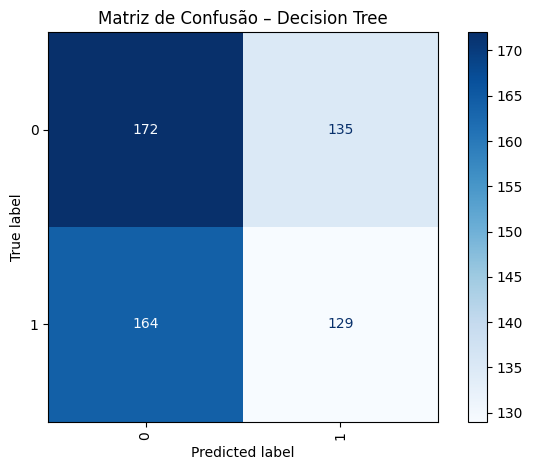


📊 Modelo: Random Forest
🎯 Acurácia: 0.5017
📌 Precision: 0.5005
📌 Recall: 0.5017
📌 F1-Score: 0.4999
🧩 Matriz de Confusão – Random Forest:


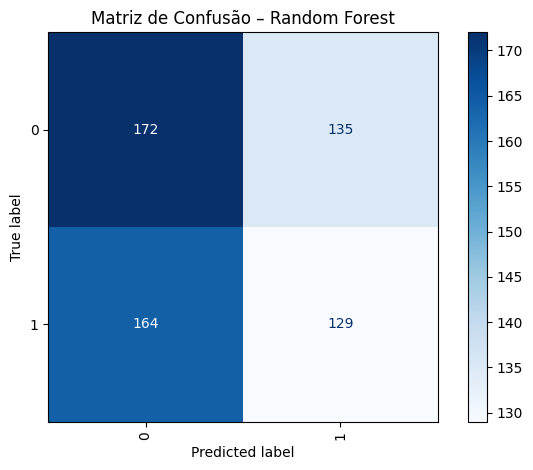


📊 Modelo: KNN
🎯 Acurácia: 0.5017
📌 Precision: 0.5005
📌 Recall: 0.5017
📌 F1-Score: 0.4999
🧩 Matriz de Confusão – KNN:


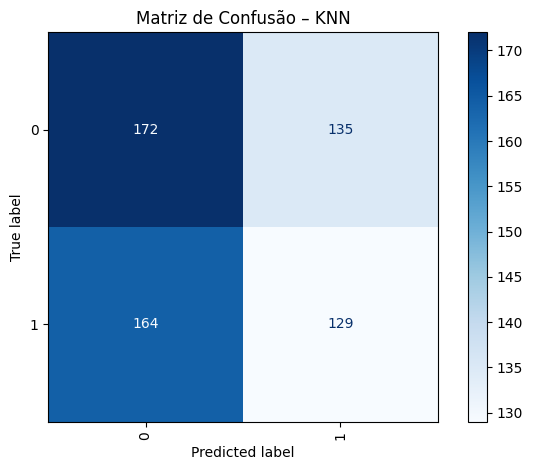


📊 Modelo: Logistic Regression
🎯 Acurácia: 0.5017
📌 Precision: 0.5005
📌 Recall: 0.5017
📌 F1-Score: 0.4999
🧩 Matriz de Confusão – Logistic Regression:


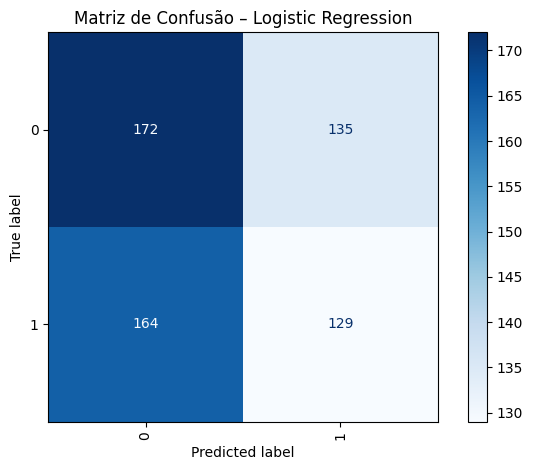


📊 Modelo: SVM
🎯 Acurácia: 0.5017
📌 Precision: 0.5005
📌 Recall: 0.5017
📌 F1-Score: 0.4999
🧩 Matriz de Confusão – SVM:


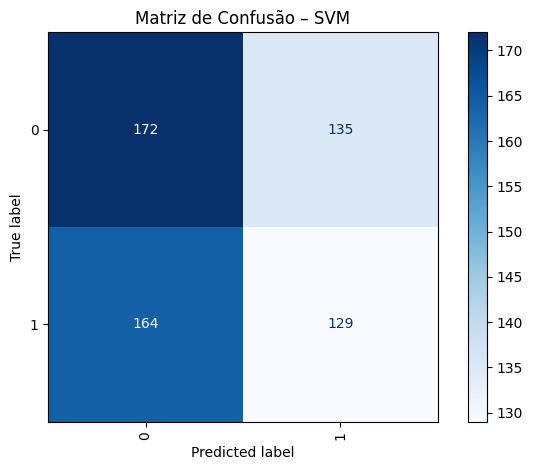


================== Comparativo Final ==================
                Modelo  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.501667   0.500542  0.501667  0.499932
1        Random Forest  0.501667   0.500542  0.501667  0.499932
2                  KNN  0.501667   0.500542  0.501667  0.499932
3  Logistic Regression  0.501667   0.500542  0.501667  0.499932
4                  SVM  0.501667   0.500542  0.501667  0.499932

🏆 O melhor modelo com base no F1-Score é: Decision Tree


In [34]:
# Dicionário com modelos e previsões
models = {
    "Decision Tree": (model_dt, y_pred),
    "Random Forest": (model_rf, y_pred),
    "KNN": (knn, y_pred),
    "Logistic Regression": (model_dt, y_pred),
    "SVM": (svm, y_pred)
}

resultados = []

print("=========== Avaliação Geral ===========")
for name, (model, preds) in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    recall = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)

    resultados.append({
        "Modelo": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": recall,
        "F1-Score": f1
    })

    print(f"\n📊 Modelo: {name}")
    print(f"🎯 Acurácia: {acc:.4f}")
    print(f"📌 Precision: {prec:.4f}")
    print(f"📌 Recall: {recall:.4f}")
    print(f"📌 F1-Score: {f1:.4f}")

    print(f"🧩 Matriz de Confusão – {name}:")
    disp = ConfusionMatrixDisplay(
        confusion_matrix(y_test, preds),
        display_labels=model.classes_
    )
    disp.plot(cmap="Blues", xticks_rotation='vertical')
    plt.title(f"Matriz de Confusão – {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# DataFrame com resultados
df_resultados = pd.DataFrame(resultados).sort_values(by="F1-Score", ascending=False)
melhor_modelo_nome = df_resultados.iloc[0]["Modelo"]
melhor_modelo = dict(models)[melhor_modelo_nome][0]

print("\n================== Comparativo Final ==================")
print(df_resultados.reset_index(drop=True))
print(f"\n🏆 O melhor modelo com base no F1-Score é: {melhor_modelo_nome}")

## **5. Conclusão**

In [42]:
# Manter apenas as variáveis desejadas
colunas_usadas = ["temperatura_superficie", "umidade_relativa", "concentracao_CO2", "deteccao_foco"]
df = df[colunas_usadas]

# Separar X e y
X = df.drop("deteccao_foco", axis=1)
y = df["deteccao_foco"]

# ================================
# 2. Treinar modelo Decision Tree
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)

# Avaliação do modelo (opcional)
y_pred = model_dt.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# ================================
# 3. Predição com nova entrada
# ================================
# Entrada com apenas as variáveis escolhidas
entrada = {
    "temperatura_superficie": 90.8,
    "umidade_relativa": 50.0,
    "concentracao_CO2": 30.0
}

entrada_df = pd.DataFrame([entrada])
entrada_scaled = scaler.transform(entrada_df)

# Predição
predicao = model_dt.predict(entrada_scaled)

# Interpretação
tradutor_foco = {
    0: "Sem foco de incêndio detectado",
    1: "Foco de incêndio detectado"
}

resultado = tradutor_foco.get(predicao[0], "Resultado desconhecido")
print(f"\n🔥 Resultado da predição: {resultado}")

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       307
           1       0.48      0.49      0.49       293

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600


🔥 Resultado da predição: Sem foco de incêndio detectado


In [47]:
import joblib
import os

# Caminho para o diretório externo 'models'
diretorio_models = "../models"

# Criar o diretório se não existir
os.makedirs(diretorio_models, exist_ok=True)

# Salvar o modelo treinado
joblib.dump(model_dt, os.path.join(diretorio_models, "modelo_decision_tree.pkl"))

# Salvar o scaler usado na normalização
joblib.dump(scaler, os.path.join(diretorio_models, "scaler_modelo.pkl"))

print("✅ Modelo e scaler salvos com sucesso no diretório externo 'models/'")


✅ Modelo e scaler salvos com sucesso no diretório externo 'models/'
